## <center style="color: red"> "Artificial Intelligence and Data Science" </center>
## <center style="color: red"> Assignment 03</center>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Problem $A$:  Data Extravaganza – Unleash the Visual Delight!

#### <li> $A_1:$  The Prelude: Navigating the Data Odyssey </li>


In [3]:
#Load the dataset into pandas dataframe
product_price_df = pd.read_csv("./Data_Sets/Product_price_index/ProductPriceIndex.csv", index_col=0)

#Revealing the structure of data
print(f"Shape of dataset: {product_price_df.shape}")

Shape of dataset: (15766, 7)


In [4]:
#Introducing the dataset with the first few rows
product_price_df.head()

,date,farmprice,atlantaretail,chicagoretail,losangelesretail,newyorkretail,averagespread
productname,,,,,,,
Strawberries,2019-05-19,$1.16,$2.23,$1.70,$1.99,$2.54,82.33%
Romaine Lettuce,2019-05-19,$0.35,$1.72,$2.00,$1.69,$1.99,428.57%
Red Leaf Lettuce,2019-05-19,$0.32,$1.84,$1.84,$1.69,$1.89,467.19%
Potatoes,2019-05-19,$1.50,$5.32,$5.14,$3.99,$6.22,244.50%
Oranges,2019-05-19,$0.41,$1.42,$1.45,$1.34,$2.05,281.71%


In [5]:
#Rename column names to some meaningful column names
new_col_names = {
    "farmprice": "farm_price",
    "atlantaretail" : "atlanta_retail",
    "chicagoretail": "chicago_retail",
    "losangelesretail": "losangeles_retail",
    "newyorkretail": "newyork_retail",
    "averagespread": "average_spread"
}
product_price_df = product_price_df.rename(columns=new_col_names)

In [6]:
#Function that'll convert object dtypes into str and flaot dtypes respectivelly
def convert_dtypes():
    #Convert productname into str object
    product_price_df.index = product_price_df.index.astype(str)

    #Convert rest object into float
    #Iterate over column names of dataset
    for col_name in product_price_df.columns[1:6]:
        #Replace $ with empty string, and then replace empty string with np.nan
        product_price_df[col_name] = product_price_df[col_name].str.replace("$", "").replace("", np.nan)
        #Now convert the string into float dtypes
        product_price_df[col_name] = product_price_df[col_name].astype(float)

    #Convert dtype of last col into float
    product_price_df["average_spread"] = product_price_df["average_spread"].str.replace("%", "").str.replace(",", "").replace("", np.nan)
    product_price_df["average_spread"] = product_price_df["average_spread"].astype(float)
    
    

convert_dtypes()

#### <li> $A_2:$ The Data Exploration: Unlocking Insights </li>

In [7]:
#Decode data types of each columns
print(f"Data types of each feature:\n{product_price_df.dtypes}")


Data types of each feature:
date                  object
farm_price           float64
atlanta_retail       float64
chicago_retail       float64
losangeles_retail    float64
newyork_retail       float64
average_spread       float64
dtype: object


In [8]:
#Begin a statistical journey
print("Complete statistical analysis of my dataset is:")
product_price_df.describe()

Complete statistical analysis of my dataset is:


,farm_price,atlanta_retail,chicago_retail,losangeles_retail,newyork_retail,average_spread
count,15765.000000,15765.000000,15766.000000,15766.000000,15758.000000,15766.000000
mean,0.595343,1.756017,1.716432,1.721203,1.973434,289.251461
std,0.482918,0.958652,0.969736,0.925166,1.123036,211.586383
min,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000
25%,0.280000,1.190000,1.220000,1.120000,1.370000,148.265000
50%,0.430000,1.510000,1.610000,1.490000,1.790000,246.040000
75%,0.780000,2.080000,2.070000,1.990000,2.320000,386.110000
max,9.000000,7.210000,6.240000,7.460000,41.490000,5775.000000


#### <li> $A_3:$ The Visual Techniques: Beyond the Basics </li>

In [9]:
product_price_df.head()

,date,farm_price,atlanta_retail,chicago_retail,losangeles_retail,newyork_retail,average_spread
productname,,,,,,,
Strawberries,2019-05-19,1.16,2.23,1.70,1.99,2.54,82.33
Romaine Lettuce,2019-05-19,0.35,1.72,2.00,1.69,1.99,428.57
Red Leaf Lettuce,2019-05-19,0.32,1.84,1.84,1.69,1.89,467.19
Potatoes,2019-05-19,1.50,5.32,5.14,3.99,6.22,244.50
Oranges,2019-05-19,0.41,1.42,1.45,1.34,2.05,281.71


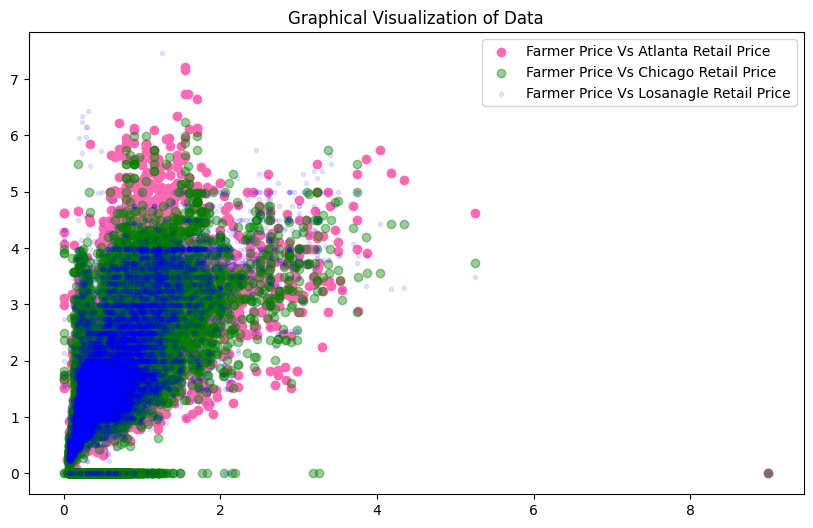

In [10]:
#Explorining the relationship between 'productname' and 'farm_price' and 'atlanta_retail'
#Create a figure of size (10, 6)
plt.figure(figsize=(10, 6))



#Overview of data by scatter plot
plt.scatter(product_price_df['farm_price'], product_price_df['atlanta_retail'], color="hotpink", 
            label="Farmer Price Vs Atlanta Retail Price")
plt.scatter(product_price_df['farm_price'], product_price_df['chicago_retail'], color="green",
            alpha=0.4, label="Farmer Price Vs Chicago Retail Price")
plt.scatter(product_price_df['farm_price'], product_price_df['losangeles_retail'], color="blue", 
            alpha=0.1, marker=".", label="Farmer Price Vs Losanagle Retail Price")


plt.title("Graphical Visualization of Data")
plt.legend()
plt.show()

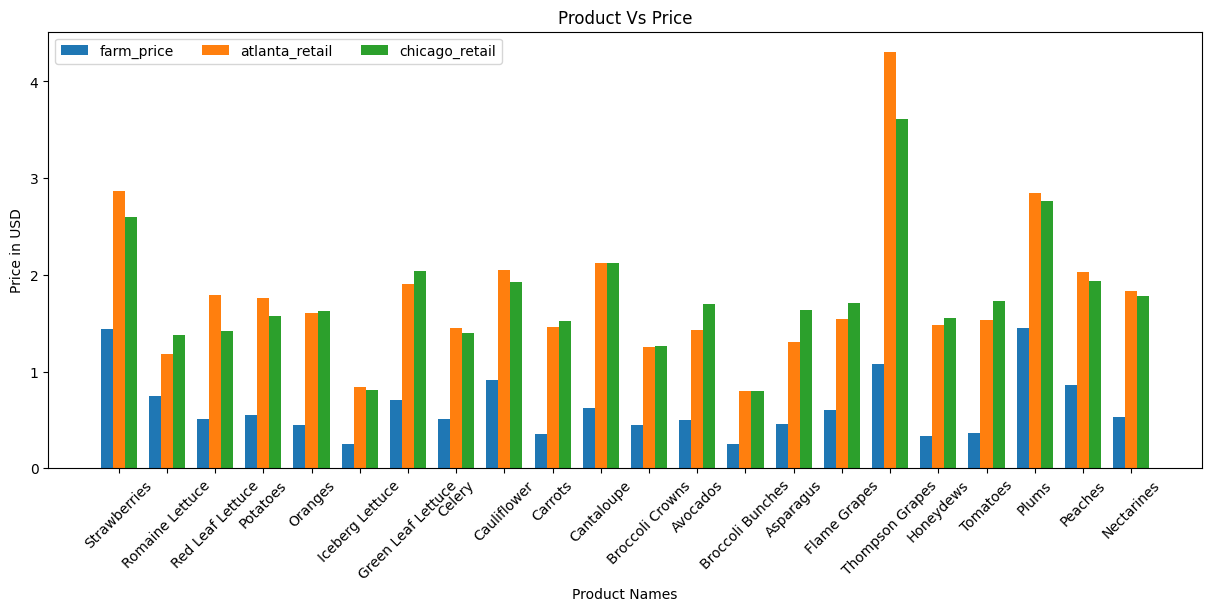

In [11]:
#Raise the curtain with a Bar Plot—highlight two or more quantities of your choice

#Bar plot b/w product name vs (farmar price, atlant retail price and chicago retail price

#Select product names
product_names = product_price_df.index
#Group them by product names and find mean in each case
avg_buy_sell_price = product_price_df.groupby([product_names])[["farm_price", "atlanta_retail", "chicago_retail"]].mean()

#Get unique product names
unique_product_names = product_price_df.index.unique()
equal_intervals = np.arange(len(unique_product_names))

#Set width and multiplier
set_width = 0.25
multipiler = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12, 6))

#Plot different bar graphs
for col in avg_buy_sell_price.columns:
    ax.bar(equal_intervals + set_width * multipiler, avg_buy_sell_price[col], width=set_width, label=col)
    multipiler += 1


ax.set_xlabel("Product Names")
ax.set_ylabel("Price in USD")
ax.set_title('Product Vs Price')
ax.set_xticks(equal_intervals + set_width, unique_product_names)
ax.legend(loc='upper left', ncols=3)
plt.xticks(rotation=45)
plt.show()


In [12]:
#Illuminate correlations with a Color Plot (Heatmap)

#Plotting the corelation b/w product name and retial price in atlantica
correlation_matrix = product_price_df.iloc[:, 1:].corr()
print(f"Co-relation matrix:\n")
correlation_matrix


Co-relation matrix:



,farm_price,atlanta_retail,chicago_retail,losangeles_retail,newyork_retail,average_spread
farm_price,1.000000,0.641017,0.604383,0.709685,0.570304,-0.516471
atlanta_retail,0.641017,1.000000,0.790936,0.835156,0.708719,-0.049840
chicago_retail,0.604383,0.790936,1.000000,0.792742,0.668087,0.038437
losangeles_retail,0.709685,0.835156,0.792742,1.000000,0.700143,-0.089739
newyork_retail,0.570304,0.708719,0.668087,0.700143,1.000000,0.060038
average_spread,-0.516471,-0.049840,0.038437,-0.089739,0.060038,1.000000


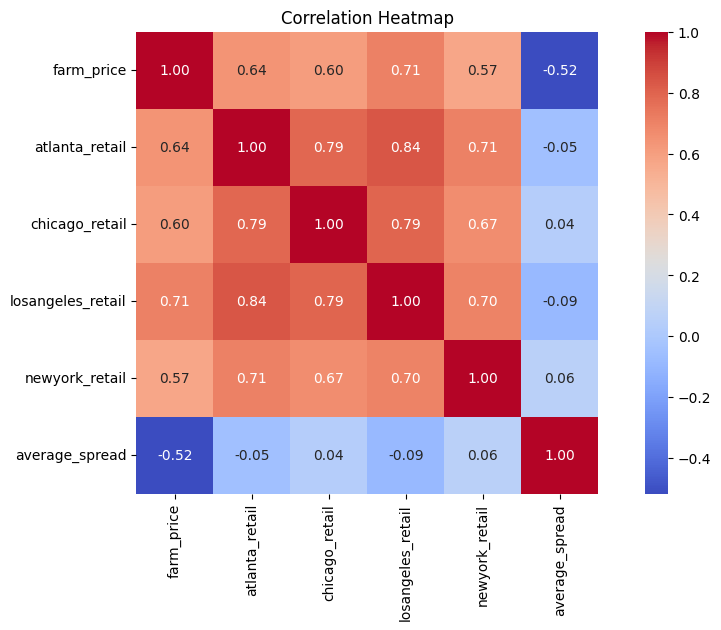

In [13]:
import seaborn as sns #Used only to draw heatmaps with ease
#Plotting corealtion matrix using heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


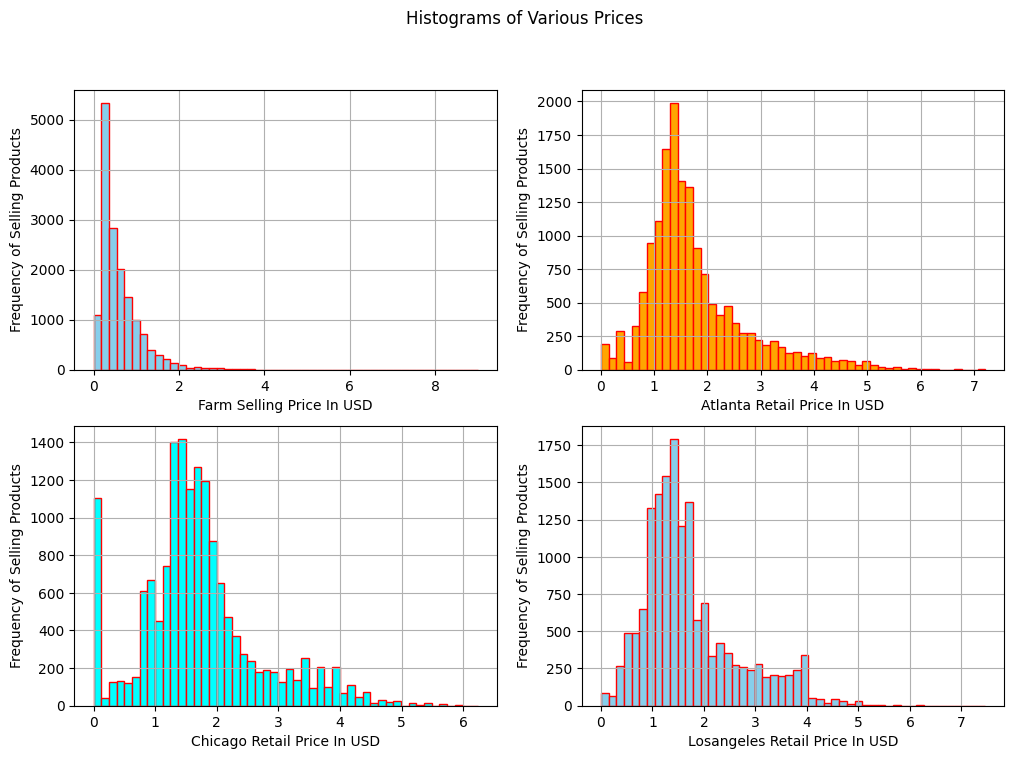

In [14]:
#Craft a Histogram—observe the distribution of different variables.

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

#Plotting fist historgram of farm price
axs[0, 0].hist(product_price_df["farm_price"], bins=50, color='skyblue', edgecolor='red')
axs[0, 0].set_xlabel('Farm Selling Price In USD')
axs[0, 0].set_ylabel('Frequency of Selling Products')
axs[0, 0].grid(True)

#Plotting second historgram of atlanta retail price
axs[0, 1].hist(product_price_df["atlanta_retail"], bins=50, color='orange', edgecolor='red')
axs[0, 1].set_xlabel('Atlanta Retail Price In USD')
axs[0, 1].set_ylabel('Frequency of Selling Products')
axs[0, 1].grid(True)

#Plotting third historgram of chicago retail price
axs[1, 0].hist(product_price_df["chicago_retail"], bins=50, color='cyan', edgecolor='red')
axs[1, 0].set_xlabel('Chicago Retail Price In USD')
axs[1, 0].set_ylabel('Frequency of Selling Products')
axs[1, 0].grid(True)


#Plotting four historgram of losangeles retail price
axs[1, 1].hist(product_price_df["losangeles_retail"], bins=50, color='skyblue', edgecolor='red')
axs[1, 1].set_xlabel('Losangeles Retail Price In USD')
axs[1, 1].set_ylabel('Frequency of Selling Products')
axs[1, 1].grid(True)

fig.suptitle('Histograms of Various Prices', fontsize=12)
plt.show()

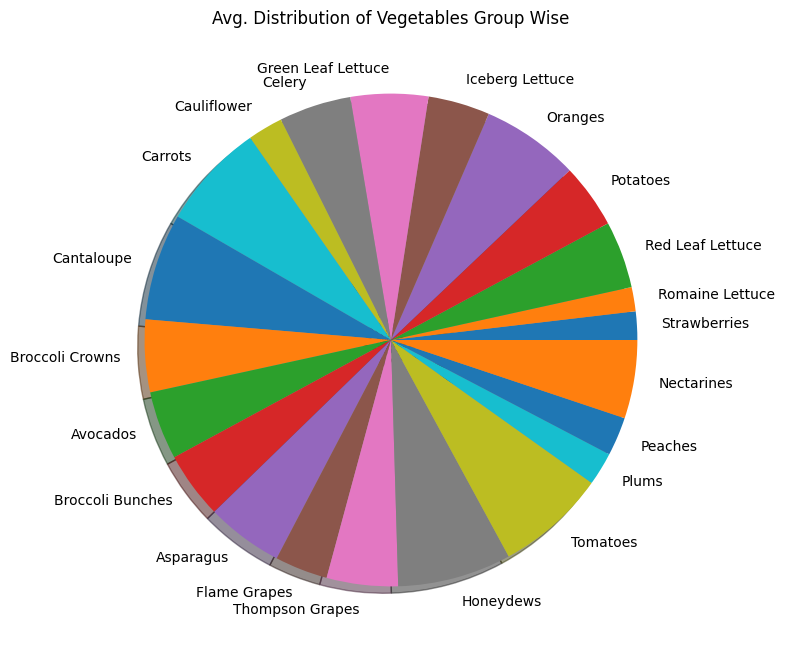

In [15]:
#Serve insights with a Pie Chart—visualize different contributions.

#Find avg. spread group wise
avg_spread_group_wise = product_price_df.groupby(["productname"])["average_spread"].mean()
_labels = product_price_df.index.unique()
plt.figure(figsize=(8, 8))
plt.pie(avg_spread_group_wise, labels=_labels, shadow=True)
plt.title("Avg. Distribution of Vegetables Group Wise")
plt.show()

#### <li> $A_4:$ The Evaluation: Which Graph Stole the Spotlight? </li>

- <b><i>Scatter Plot</i></b>: The scatter plot provides me with a rough idea of how the data is distributed across the range of values. It visualizes the relationship between the variables and helps me identify any patterns or trends. However, despite its usefulness in giving an overview, the distribution plot, which provides more detailed information about how the data is spread out, did not offer much assistance in this particular context. It may be that the distribution plot lacked clarity or did not reveal any additional insights beyond what was already apparent from the scatter plot.
  
- <b><i>Bar Plot</i></b>: The bar plot helps me understand the price differences of products sold in various parts of the cities. It provides a comprehensive overview of the cost variations, indicating whether the products are being sold at higher or lower prices. This visualization offers valuable insights into the profitability for retailers, illustrating how much profit they make after purchasing products in smaller quantities from farmers. By comparing prices across different areas, I can assess market trends and make informed decisions about purchasing and selling strategies

- <b><i>Heat Map: </i></b>: The heat map assists me in comprehending the visualization of Pearson's correlation matrix. In this matrix, a correlation coefficient of <b>1 indicates a strong positive correlation</b>, <b>0 suggests a moderate correlation</b>, and <b>-1 indicates a strong negative correlation or no correlation</b>. By examining the heat map, I can quickly identify patterns and relationships between variables. This allows for a deeper understanding of the data and aids in making informed decisions based on the strength and direction of the correlations.

- <b><i>Histogram: </i></b>: The histogram assists me in comprehending the data more effectively and accurately. It provides detailed insights into the frequencies of products sold by farmers and retailers respectively. By examining the histogram, I can discern the distribution patterns of sales for each group. This allows me to identify the most common selling prices and quantities, providing valuable information for analyzing market trends and making informed decisions. Additionally, the histogram facilitates a deeper understanding of the variability and distribution of sales data, enabling more precise assessments of market dynamics


- <b><i>PieChart: </i></b>: The pie chart provides me with a visual overview of the average spread of data across different groups. It offers a quick glance at how the data is distributed among various categories or groups. By examining the pie chart, I can easily perceive the proportion of each group relative to the whole dataset. This visualization aids in understanding the relative sizes or contributions of different categories, facilitating quick comparisons and insights into the distribution patterns of the data.

#### <li> $A_5:$ The Conclusion: Insights Unveiled </li>

- Load and Print the First Few Rows of the Data


In [16]:
#Load the dataset into pandas dataframe
education_df = pd.read_csv("./Data_Sets/US_demo_graphics/Educationv.csv", index_col=0)
finance_df = pd.read_csv("./Data_Sets/US_demo_graphics/Finance.csv", index_col=0)
industry_df = pd.read_csv("./Data_Sets/US_demo_graphics/Industry.csv", index_col=0)


#Revealing the structure of data
print(f"Shape of datasets:\n Education: {education_df.shape}\n Finance: {finance_df.shape}\n Industry {industry_df.shape}")

Shape of datasets:
 Education: (874, 4)
 Finance: (1311, 12)
 Industry (1311, 42)


In [17]:
#Introducing the dataset with the first few rows

#Priniting first few rows of education dataset
education_df.head()

,cd,Bachelors_degree_or_higher,high_school_or_some_degree,Less_than_high_school_graduate
Year,,,,
2020,0_AK,121098,309698,33572
2020,0_DC,277816,177505,34652
2020,0_DE,175338,351177,57053
2020,0_ND,137958,303148,26631
2020,0_PR,121098,309698,33572


In [18]:
#Priniting first few rows of finance dataset
finance_df.head()

,cd,Less_than_$5000,$5000_to_$9999,$10000_to_$14999,$15000_to_$19999,$20000_to_$24999,$25000_to_$34999,$35000_to_$49999,$50000_to_$74999,$75000_to_$99999,$100000_to_$149999,$150000_or_more
Year,,,,,,,,,,,,
2019,0_AK,5746,4600,7294,8276,8110,17476,26315,44593,35414,49254,46182
2019,0_DC,14138,10318,12304,9470,7695,16841,21906,34694,30240,46707,80073
2019,0_DE,11281,7942,12874,12469,14976,31208,43421,64673,52472,60199,52984
2019,0_ND,9110,9039,12923,13021,12824,27603,38832,57179,45844,54543,38625
2019,0_PR,181287,141265,140140,122766,94982,145595,141659,119535,49486,33679,21805


In [19]:
#Priniting first few rows of industry dataset
industry_df.head()

,cd,Total_Agriculture_forestry_fishing_hunting_mining,Total_Construction,Total_Manufacturing,Total_Wholesale_trade,Total_Retail_trade,Total_Transportation_warehousing_utilities,Total_Information,Total_Finance_insurance_realestate_rental_leasing,Total_Professional_scientific_management_administrative_waste_management_services,...,Female_Wholesale_trade,Female_Retail_trade,Female_Transportation_warehousing_utilities,Female_Information,Female_Finance_insurance_realestate_rental_leasing,Female_Professional_scientific_management_administrative_waste_management_services,Female_Educationalservices_healthcare_socialassistance,Female_Arts_entertainment_recreation_accommodation_foodservices,Female_Otherservices_except_Public_administration,Female_Public_administration
Year,,,,,,,,,,,,,,,,,,,,,
2019,0_PR,6239,33555,73692,23153,70787,29104,12717,46604,64671,...,6012,29811,6283,4613,27197,22920,120146,16304,9342,35707
2019,1_MA,1612,16225,37577,8364,25590,15131,4228,22218,20786,...,2188,10088,3248,1727,12659,8124,51768,6292,4436,5532
2019,2_MA,1294,14207,32599,6414,20952,9529,6162,17239,30934,...,1929,7766,1660,2253,8629,10494,44123,5242,4462,4097
2019,3_MA,541,18000,48852,7105,22137,11373,7342,17442,40499,...,2058,8157,2782,2565,8799,13879,43803,6227,5280,4607
2019,4_MA,590,19548,36590,10322,27693,11294,7526,30364,47905,...,2556,11035,2645,2841,13022,17985,53630,6214,5104,5422


- Decode Data Types of Each Columns

In [20]:
#Data types of education dataset
print(f"Data types of each feature in education dataset:\n{education_df.dtypes}\n {"="*100}")
#Data types of finance dataset
print(f"Data types of each feature in finance dataset:\n{finance_df.dtypes}\n{ "="*100}")
#Data types of industry dataset
print(f"Data types of each feature in industry dataset:\n{industry_df.dtypes}\n {"="*100}")


Data types of each feature in education dataset:
cd                                object
Bachelors_degree_or_higher         int64
high_school_or_some_degree         int64
Less_than_high_school_graduate     int64
dtype: object
Data types of each feature in finance dataset:
cd                    object
Less_than_$5000        int64
$5000_to_$9999         int64
$10000_to_$14999       int64
$15000_to_$19999       int64
$20000_to_$24999       int64
$25000_to_$34999       int64
$35000_to_$49999       int64
$50000_to_$74999       int64
$75000_to_$99999       int64
$100000_to_$149999     int64
$150000_or_more        int64
dtype: object
Data types of each feature in industry dataset:
cd                                                                                    object
Total_Agriculture_forestry_fishing_hunting_mining                                      int64
Total_Construction                                                                     int64
Total_Manufacturing                  

- Begin a Statistical Journey

In [21]:
#Stastical analysis of education dataset
print("Complete statistical analysis of my education dataset is:")
education_df.describe()

Complete statistical analysis of my education dataset is:


,Bachelors_degree_or_higher,high_school_or_some_degree,Less_than_high_school_graduate
count,874.000000,8.740000e+02,874.000000
mean,145140.191076,2.697666e+05,49555.389016
std,80253.572692,1.090870e+05,30658.095659
min,2872.000000,1.260300e+04,2072.000000
25%,92277.500000,1.990038e+05,31810.500000
50%,125552.500000,2.666335e+05,43866.000000
75%,180793.250000,3.409162e+05,58573.250000
max,561182.000000,1.191468e+06,257422.000000


In [22]:
#Mapping of old col names with new col names
col_names = {
    'Less_than_$5000': 'Less_than_\\$5000',
    '$5000_to_$9999': '$5000_to_\\$9999',
    '$10000_to_$14999': '$10000_to_\\$14999',
    '$15000_to_$19999': '$15000_to_\\$19999',
    '$20000_to_$24999': '$20000_to_\\$24999',
    '$25000_to_$34999': '$25000_to_\\$34999',
    '$35000_to_$49999': '$35000_to_\\$49999',
    '$50000_to_$74999': '$50000_to_\\$74999',
    '$75000_to_$99999': '$75000_to_\\$99999',
    '$100000_to_$149999': '$100000_to_\\$149999',
    '$150000_or_more': '$150000_or_more'
}

							
#Renaming column names
finance_df = finance_df.rename(columns=col_names)

#Stastical analysis of finance dataset
print("Complete statistical analysis of my finance dataset is:")
finance_df.describe()

Complete statistical analysis of my finance dataset is:


,Less_than_\$5000,$5000_to_\$9999,$10000_to_\$14999,$15000_to_\$19999,$20000_to_\$24999,$25000_to_\$34999,$35000_to_\$49999,$50000_to_\$74999,$75000_to_\$99999,$100000_to_\$149999,$150000_or_more
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,9111.082380,7839.620900,11803.873379,11723.336384,12223.723875,24368.577422,33640.344775,48081.289855,35876.700229,44053.581236,44027.474447
std,9216.131279,7570.691867,8406.918768,7627.616235,6786.578523,12019.428477,14742.349222,18913.210629,13522.222894,18113.392401,30450.530816
min,64.000000,117.000000,207.000000,161.000000,227.000000,619.000000,989.000000,1454.000000,1404.000000,1315.000000,413.000000
25%,5638.500000,4747.500000,7417.000000,7431.500000,7998.500000,16455.500000,24091.500000,36493.500000,27768.500000,31766.500000,23356.000000
50%,8071.000000,6781.000000,10974.000000,11108.000000,11832.000000,23970.000000,33055.000000,47555.000000,35939.000000,43312.000000,35041.000000
75%,11073.500000,9509.500000,14881.000000,15019.500000,15677.000000,31634.500000,43687.000000,61654.500000,45399.000000,54861.000000,54517.500000
max,181287.000000,141265.000000,140660.000000,122766.000000,98327.000000,151568.000000,144417.000000,127706.000000,76342.000000,115133.000000,231623.000000


In [23]:
#Stastical analysis of industry dataset
print("Complete statistical analysis of my industry dataset is:")
industry_df.describe()

Complete statistical analysis of my industry dataset is:


,Total_Agriculture_forestry_fishing_hunting_mining,Total_Construction,Total_Manufacturing,Total_Wholesale_trade,Total_Retail_trade,Total_Transportation_warehousing_utilities,Total_Information,Total_Finance_insurance_realestate_rental_leasing,Total_Professional_scientific_management_administrative_waste_management_services,Total_Educationalservices_healthcare_socialassistance,...,Female_Wholesale_trade,Female_Retail_trade,Female_Transportation_warehousing_utilities,Female_Information,Female_Finance_insurance_realestate_rental_leasing,Female_Professional_scientific_management_administrative_waste_management_services,Female_Educationalservices_healthcare_socialassistance,Female_Arts_entertainment_recreation_accommodation_foodservices,Female_Otherservices_except_Public_administration,Female_Public_administration
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,...,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000
mean,4570.873379,18285.215866,31023.640732,7630.355454,23782.874142,15247.643021,5428.139588,19548.557590,31234.946606,55997.322654,...,2116.567506,10170.233410,3449.428680,2033.698703,10220.335622,12196.099161,40327.127384,7289.638444,4587.351640,6439.446987
std,5731.345391,8559.792516,18942.502118,3801.505670,9758.381081,7709.733348,4498.918795,11231.345049,19611.041081,22390.397381,...,1228.738149,4241.657006,2051.731459,1772.710421,5183.464170,7563.228284,15976.881942,4104.091604,2319.494714,4285.322740
min,57.000000,1225.000000,1097.000000,203.000000,1065.000000,567.000000,67.000000,545.000000,792.000000,1773.000000,...,72.000000,443.000000,81.000000,0.000000,354.000000,223.000000,1369.000000,284.000000,84.000000,75.000000
25%,936.500000,12720.000000,16856.000000,5199.000000,17782.000000,10412.000000,3037.500000,11877.000000,18533.500000,41383.000000,...,1289.000000,7637.500000,2181.500000,1107.000000,6735.000000,7147.500000,30128.000000,5057.500000,3093.000000,3960.500000
50%,2478.000000,17307.000000,28490.000000,6841.000000,22783.000000,13704.000000,4242.000000,16764.000000,25525.000000,56079.000000,...,1829.000000,9723.000000,2978.000000,1630.000000,9159.000000,10154.000000,40291.000000,6487.000000,4228.000000,5450.000000
75%,5769.500000,22595.000000,41640.000000,9438.500000,29374.500000,18562.000000,6415.500000,24495.500000,38740.000000,70510.500000,...,2656.500000,12669.500000,4146.000000,2369.000000,12945.000000,15007.500000,51230.000000,8827.000000,5588.500000,7781.000000
max,49641.000000,59709.000000,116257.000000,24916.000000,74369.000000,51201.000000,47969.000000,71112.000000,126057.000000,167723.000000,...,8548.000000,32623.000000,16699.000000,19425.000000,29256.000000,47166.000000,120213.000000,53079.000000,17319.000000,37435.000000


- Explorining the Relationship Between Education Data

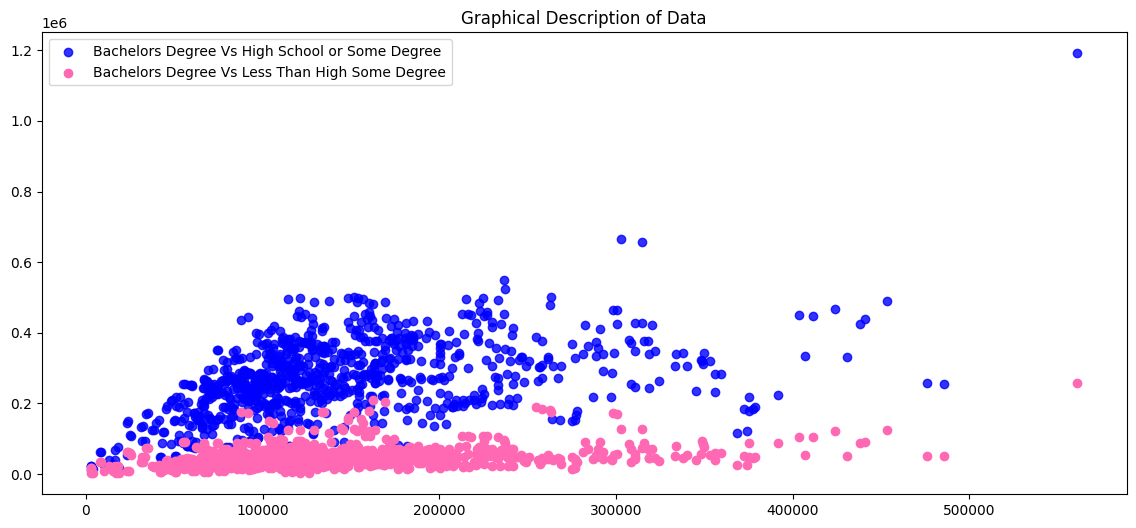

In [24]:
plt.figure(figsize=(14, 6))

#Scatter plot : A Quick overview of data

#Scatter plot of education dataset
plt.scatter(education_df['Bachelors_degree_or_higher'], education_df['high_school_or_some_degree'],
            color="blue", label="Bachelors Degree Vs High School or Some Degree", alpha=0.8)
plt.scatter(education_df['Bachelors_degree_or_higher'], education_df['Less_than_high_school_graduate'],
            color="hotpink", label="Bachelors Degree Vs Less Than High Some Degree")


plt.title("Graphical Description of Data")
plt.legend()
plt.show()

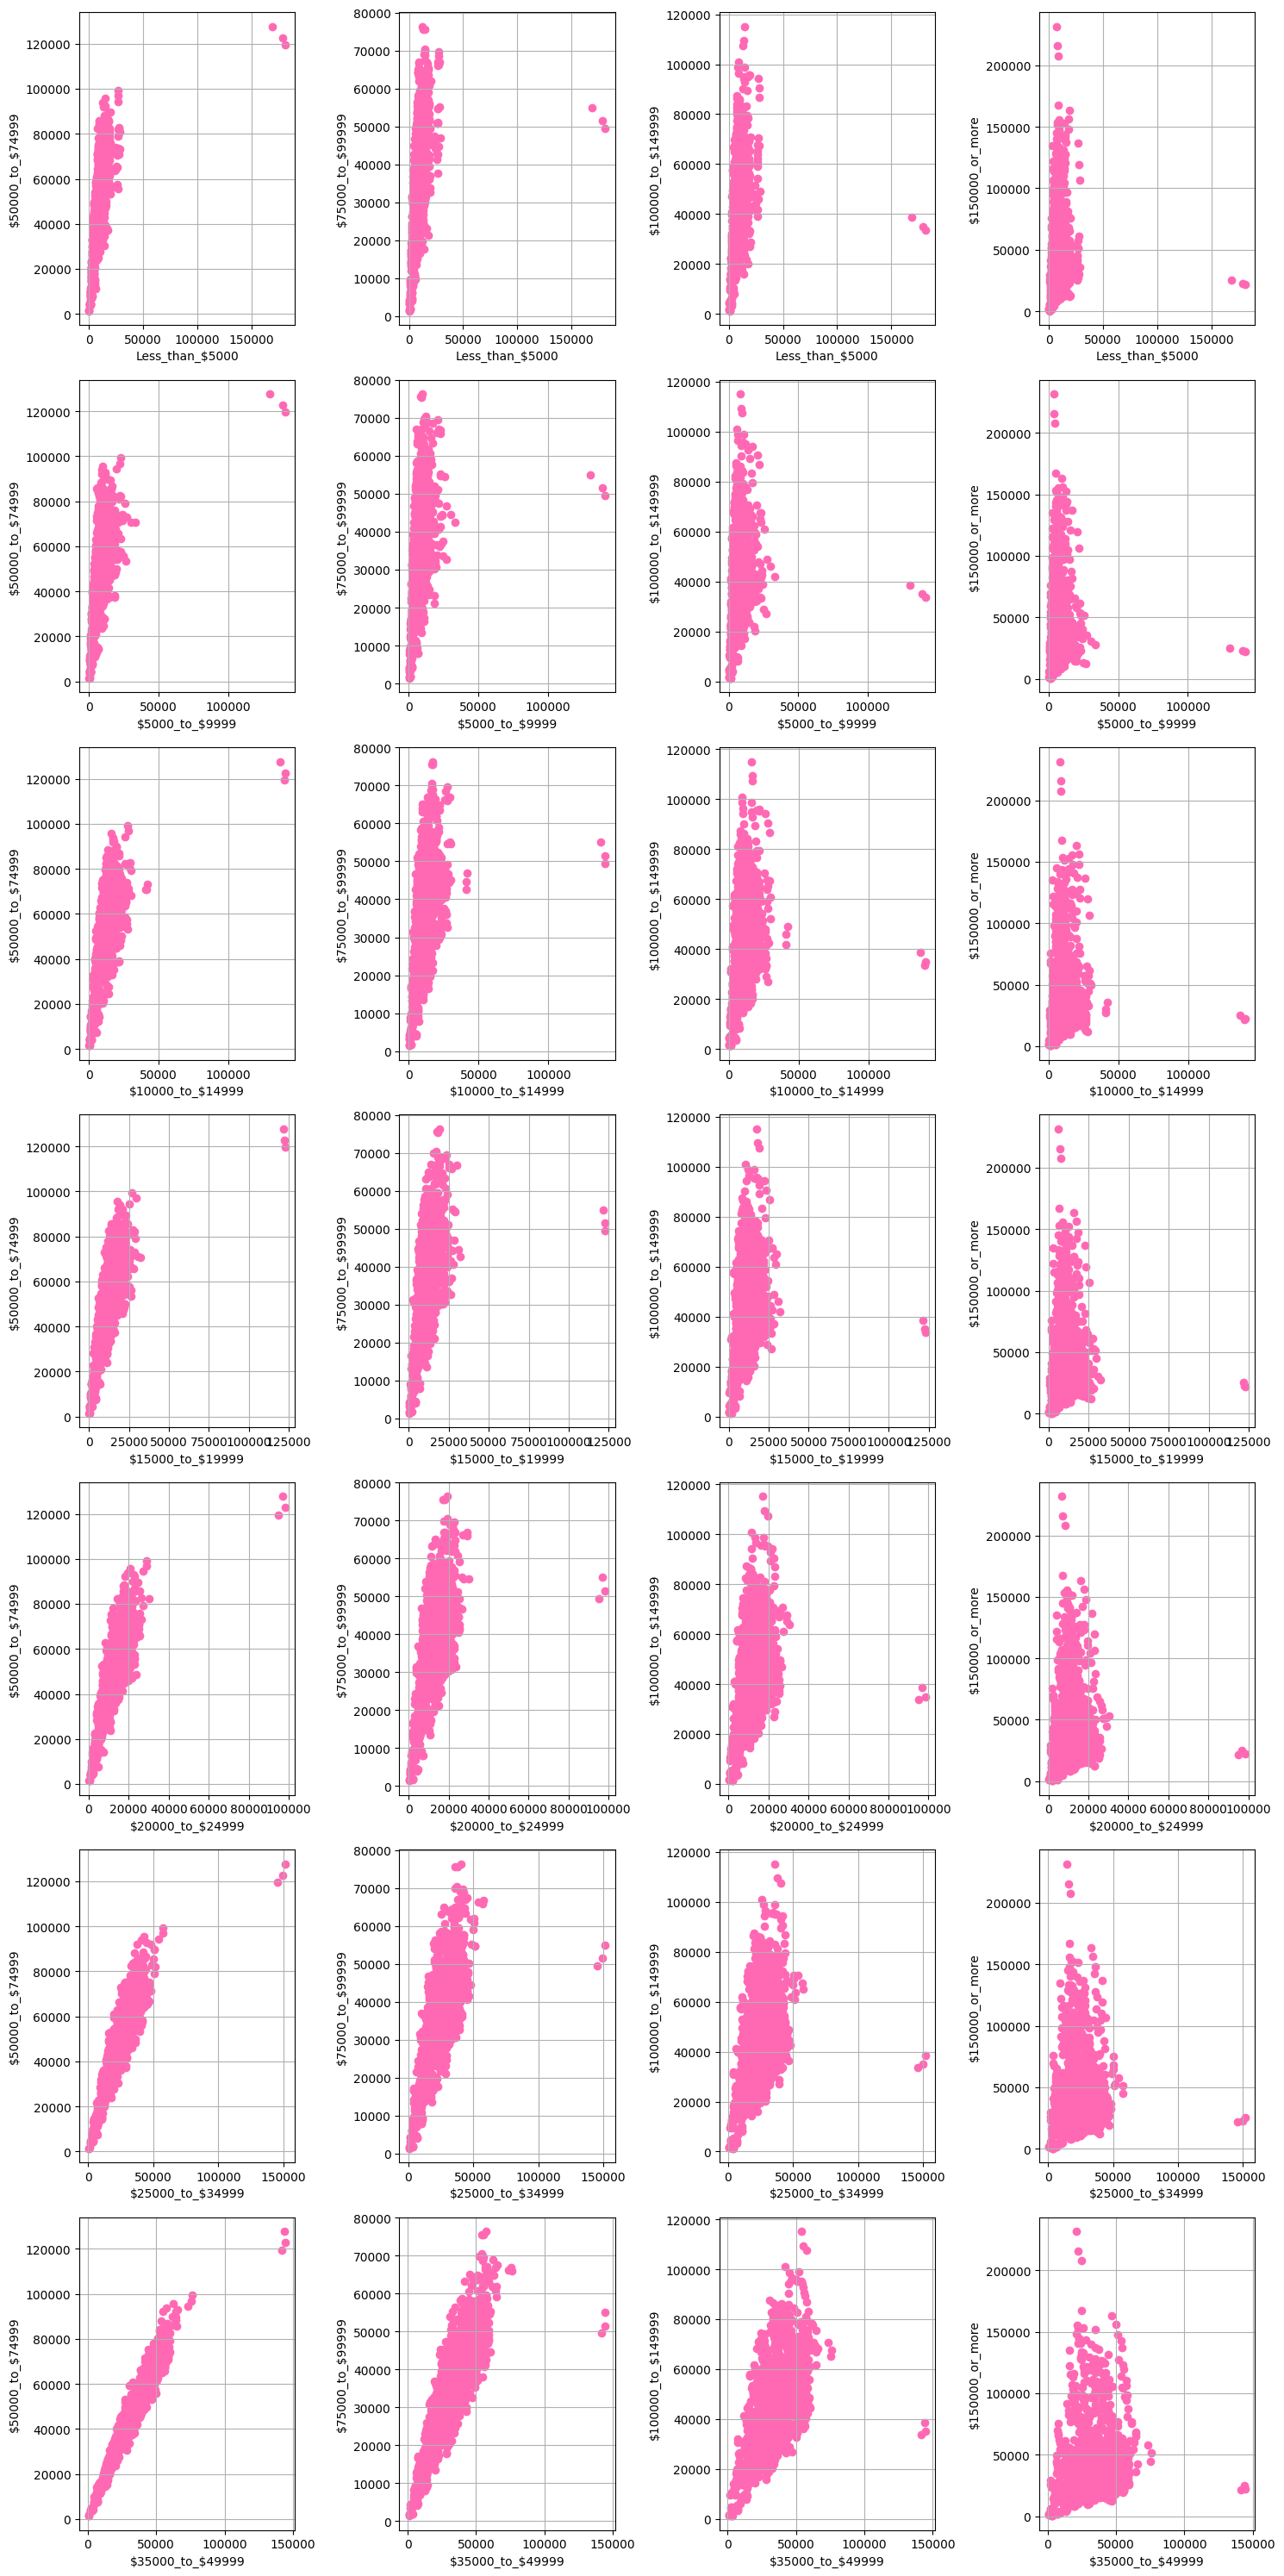

In [25]:
#Scatter plot of finance dataset

#Compute no. of rows and no. of cols for figure
rows = finance_df.columns[1:8]
cols = finance_df.columns[8:]


fig, axes = plt.subplots(nrows=len(rows), ncols=len(cols), figsize=(15, 30))
for index1, col_name1 in enumerate(rows):
    for index2, col_name2 in enumerate(cols):
        axes[index1, index2].scatter(finance_df[col_name1], finance_df[col_name2], color="hotpink")

        #Set title and  xlabel and ylabel
        axes[index1, index2].set_xlabel(col_name1)
        axes[index1, index2].set_ylabel(col_name2)
        axes[index1, index2].grid(True)
        

plt.tight_layout()
plt.show()

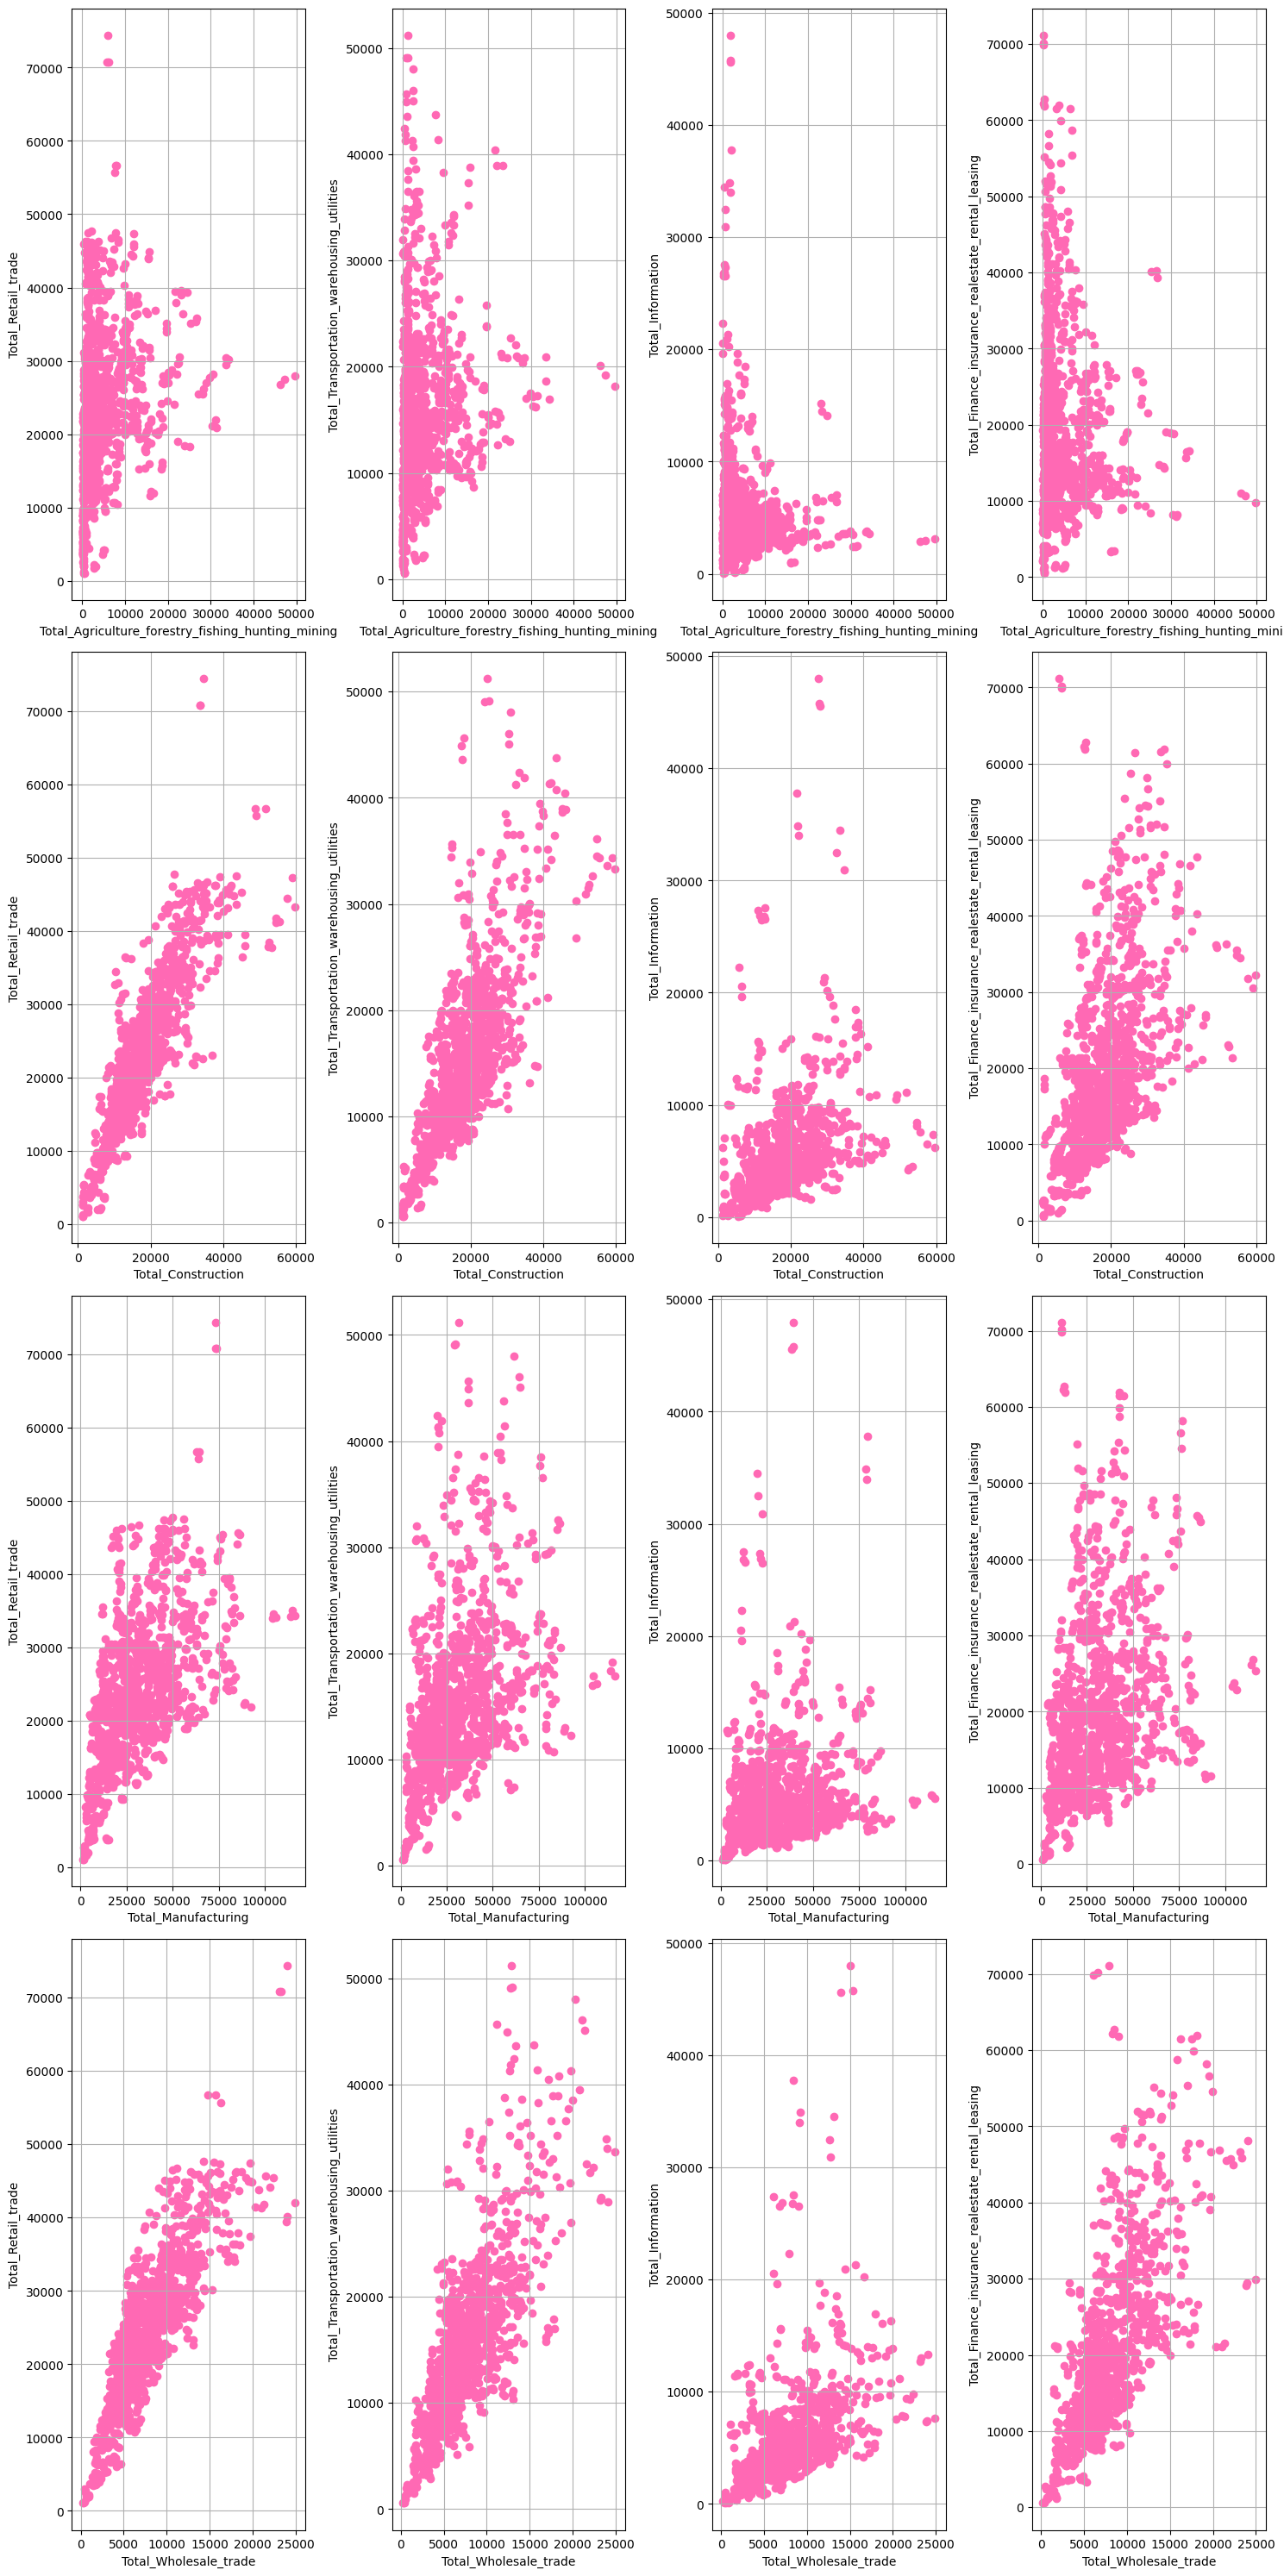

In [26]:
##Scatter plot of industry dataset

#Assigining col names to variables
c1 = "Total_Agriculture_forestry_fishing_hunting_mining"
c2 = "Total_Construction"
c3 = "Total_Manufacturing"
c4 = "Total_Wholesale_trade"
c5 = "Total_Retail_trade"
c6 = "Total_Transportation_warehousing_utilities"
c7 = "Total_Information"
c8 = "Total_Finance_insurance_realestate_rental_leasing"

#Dividing col names into rows and cols
rows = [c1, c2, c3, c4]
cols = [c5, c6, c7, c8]


fig, axes = plt.subplots(nrows=len(rows), ncols=len(cols), figsize=(15, 30))
for index1, col_name1 in enumerate(rows):
    for index2, col_name2 in enumerate(cols):
        #Plot scatter plots
        axes[index1, index2].scatter(industry_df[col_name1], industry_df[col_name2], color="hotpink")

        #Set title and  xlabel and ylabel
        axes[index1, index2].set_xlabel(col_name1)
        axes[index1, index2].set_ylabel(col_name2)
        axes[index1, index2].grid(True)
        

plt.tight_layout()
plt.show()



- Bar Plots

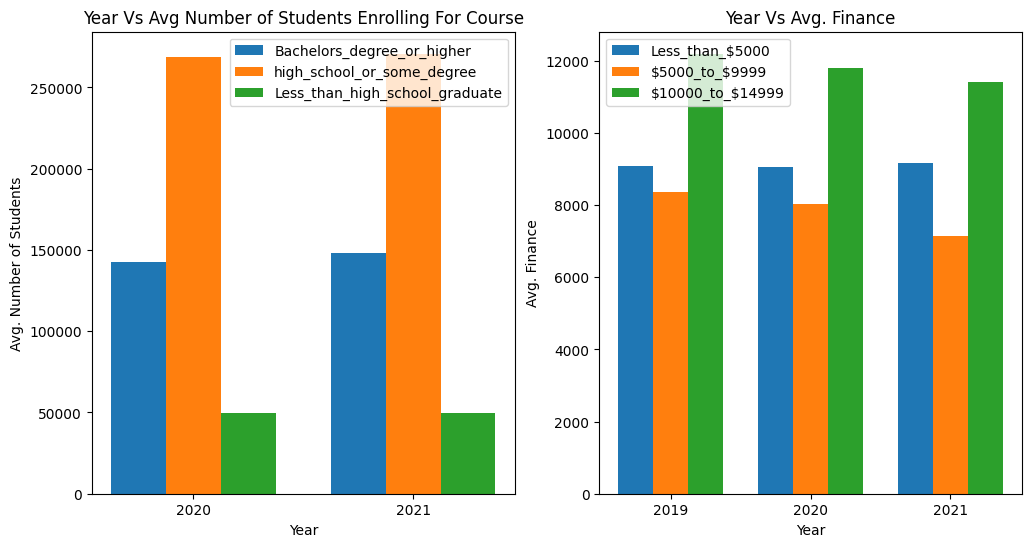

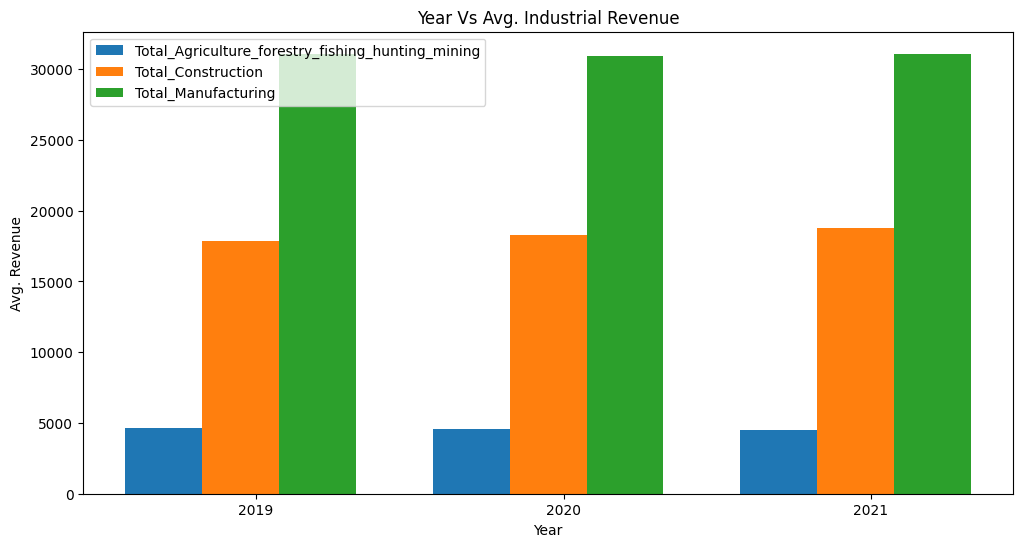

In [27]:
#Select only float/int cols
#Group them by year and then take mean of each course
avg_student_per_course = education_df.iloc[:, 1:].groupby(['Year']).mean()
len_of_dist_years_in_edu = len(avg_student_per_course.index)


#Group them by year and then take mean of each financial year
avg_financial_price = finance_df.iloc[:, 1:].groupby(['Year']).mean()
len_of_dist_years_in_fin = len(avg_financial_price.index)


#Group them by year and then take mean of each industrial year
avg_industrial_price = industry_df.iloc[:, 1:].groupby(['Year']).mean()
len_of_dist_years_in_ind = len(avg_financial_price.index)


#Setting width and equal intervals for xticks
set_width = 0.25
equal_intervals_for_edu = np.arange(len_of_dist_years_in_edu)
equal_intervals_for_fin = np.arange(len_of_dist_years_in_fin)
equal_intervals_for_ind = np.arange(len_of_dist_years_in_ind)



#========================================Education DataSet==================================#
#Create a subplot with 1 rows and 2 columns
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

#Plot the bar graph for education dataset
multiplier = 0
for col in avg_student_per_course.columns:
    ax[0].bar(equal_intervals_for_edu + set_width * multiplier, avg_student_per_course[col], 
              width=set_width, label=col)
    multiplier += 1
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Avg. Number of Students")
ax[0].set_title('Year Vs Avg Number of Students Enrolling For Course')
ax[0].legend()
ax[0].set_xticks(equal_intervals_for_edu + set_width, avg_student_per_course.index)





#========================================Finance DataSet==================================#
#Narrowing down the dataset(finance) for ease to visulaize
avg_financial_price = avg_financial_price.iloc[:, 0:3]

#Plot the bar graph for finance dataset
multipiler = 0
for col in avg_financial_price.columns:
    ax[1].bar(equal_intervals_for_fin + set_width * multiplier, avg_financial_price[col], 
              width=set_width, label=col)
    multiplier += 1
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Avg. Finance")
ax[1].set_title('Year Vs Avg. Finance')
ax[1].legend()
ax[1].set_xticks(equal_intervals_for_fin + 1, avg_financial_price.index)
plt.show()





#========================================Industry DataSet==================================#
#Narrowing down the dataset(industry) for ease to visulaize
avg_industrial_price = avg_industrial_price.iloc[:, 0:3]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
#Plot the bar graph for industry dataset
multipiler = 0
for col in avg_industrial_price.columns:
    ax.bar(equal_intervals_for_ind + set_width * multiplier, avg_industrial_price[col], 
              width=set_width, label=col)
    multiplier += 1
ax.set_xlabel("Year")
ax.set_ylabel("Avg. Revenue")
ax.set_title('Year Vs Avg. Industrial Revenue')
ax.legend()
ax.set_xticks(equal_intervals_for_fin + 1.8, avg_financial_price.index)
plt.show()



- Illuminate Correlations With a Color Plot (Heatmap)

In [28]:
#======================================== Co-relation In Education DataSet==================================#
#Finding co-relation amoung attributes of education dataset
correlation_matrix_edu = education_df.iloc[:, 1:].corr()
print(f"Co-relation matrix for education attributes:\n")
correlation_matrix_edu

Co-relation matrix for education attributes:



,Bachelors_degree_or_higher,high_school_or_some_degree,Less_than_high_school_graduate
Bachelors_degree_or_higher,1.000000,0.456059,0.308184
high_school_or_some_degree,0.456059,1.000000,0.730632
Less_than_high_school_graduate,0.308184,0.730632,1.000000


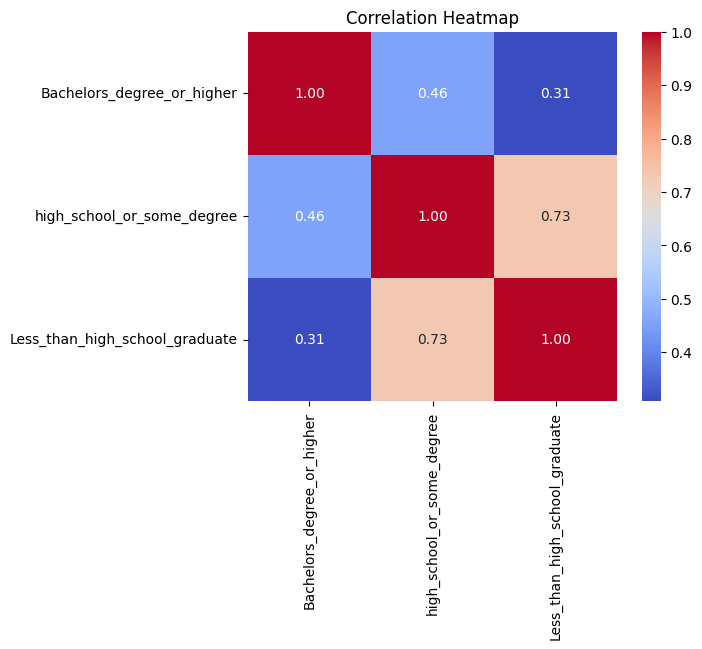

In [29]:
#Plotting corealtion matrix using heatmap
plt.figure()
sns.heatmap(correlation_matrix_edu, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

In [30]:
#======================================== Co-relation In Finance DataSet==================================#
#Finding co-relation amoung attributes of education dataset
correlation_matrix_fin = finance_df.iloc[:, 1:5].corr()
print(f"Co-relation matrix for finance attributes:\n")
correlation_matrix_fin

Co-relation matrix for finance attributes:



,Less_than_\$5000,$5000_to_\$9999,$10000_to_\$14999,$15000_to_\$19999
Less_than_\$5000,1.000000,0.968850,0.935273,0.914586
$5000_to_\$9999,0.968850,1.000000,0.962916,0.948365
$10000_to_\$14999,0.935273,0.962916,1.000000,0.979233
$15000_to_\$19999,0.914586,0.948365,0.979233,1.000000


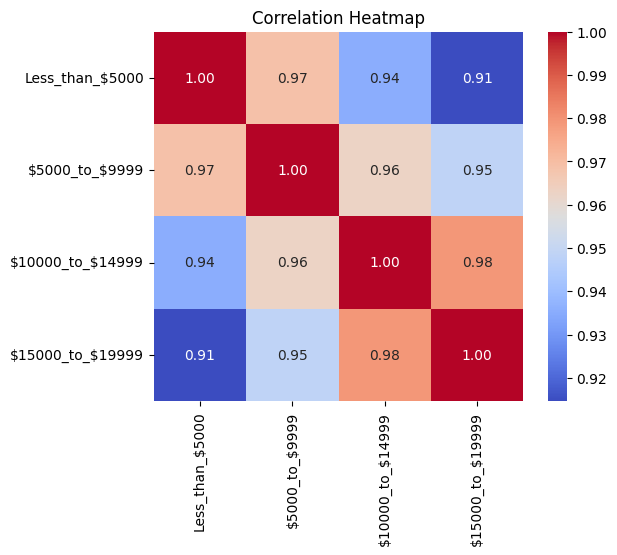

In [31]:
#Plotting corealtion matrix using heatmap
plt.figure()
sns.heatmap(correlation_matrix_fin, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


In [32]:
#======================================== Co-relation In Industry DataSet==================================#
#Finding co-relation amoung attributes of education dataset
correlation_matrix_ind = industry_df.iloc[:, 1:5].corr()
print(f"Co-relation matrix for Industry attributes:\n")
correlation_matrix_ind

Co-relation matrix for Industry attributes:



,Total_Agriculture_forestry_fishing_hunting_mining,Total_Construction,Total_Manufacturing,Total_Wholesale_trade
Total_Agriculture_forestry_fishing_hunting_mining,1.000000,0.295146,0.146037,0.177504
Total_Construction,0.295146,1.000000,0.425385,0.729496
Total_Manufacturing,0.146037,0.425385,1.000000,0.613070
Total_Wholesale_trade,0.177504,0.729496,0.613070,1.000000


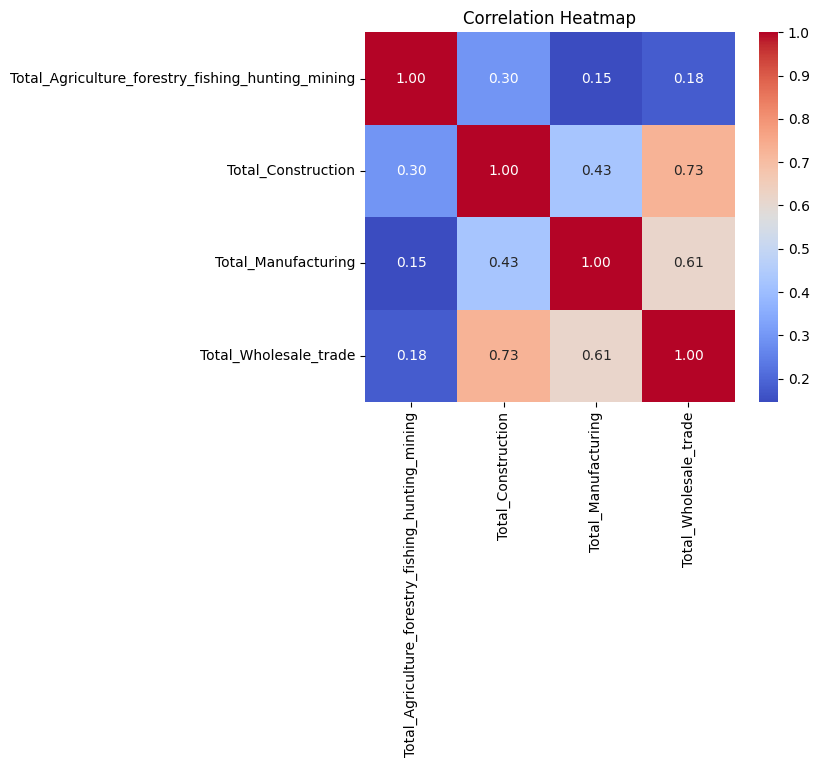

In [33]:
#Plotting corealtion matrix using heatmap
plt.figure()
sns.heatmap(correlation_matrix_ind, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

- Plotting Histograms

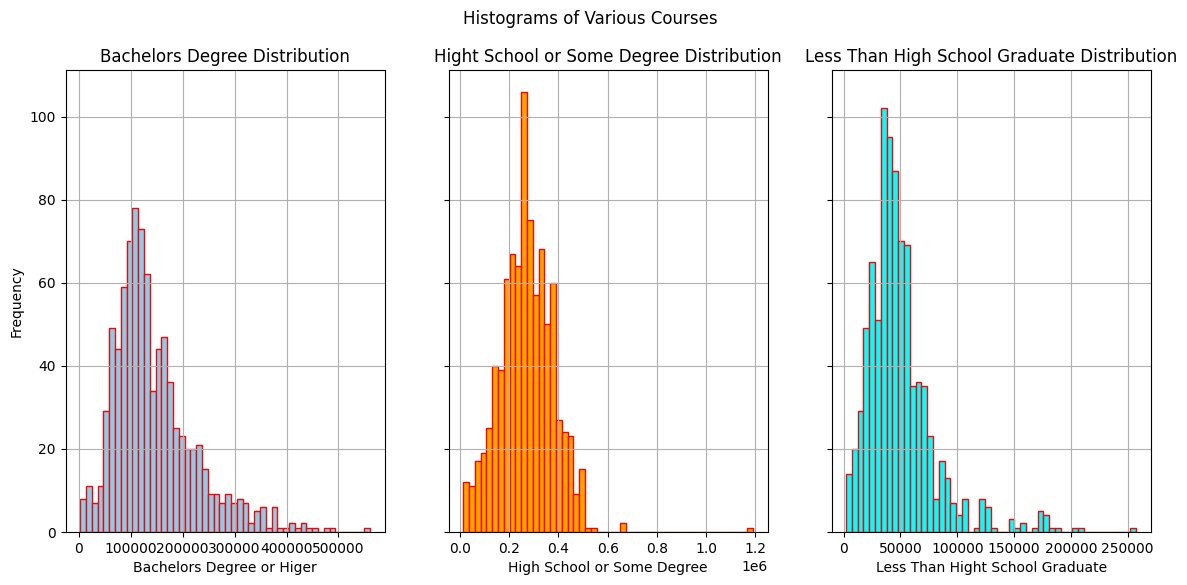

In [34]:
#======================================== Histogram For Education DataSet==================================#
fig, axs = plt.subplots(1, 3, figsize=(14, 6), sharey=True)

#Plotting fist historgram of bachelors degree or higer
axs[0].hist(education_df["Bachelors_degree_or_higher"], bins=50, color='skyblue', edgecolor='red')
axs[0].set_title('Bachelors Degree Distribution')
axs[0].set_xlabel('Bachelors Degree or Higer')
axs[0].set_ylabel('Frequency')
axs[0].grid(True)

#Plotting second historgram of high school or some degree
axs[1].hist(education_df["high_school_or_some_degree"], bins=50, color='orange', edgecolor='red')
axs[1].set_title('Hight School or Some Degree Distribution')
axs[1].set_xlabel('High School or Some Degree')
axs[1].grid(True)

#Plotting third historgram of less than hight school graduate
axs[2].hist(education_df["Less_than_high_school_graduate"], bins=50, color='cyan', edgecolor='red')
axs[2].set_title('Less Than High School Graduate Distribution')
axs[2].set_xlabel('Less Than Hight School Graduate')
axs[2].grid(True)



fig.suptitle('Histograms of Various Courses', fontsize=12)
plt.show()

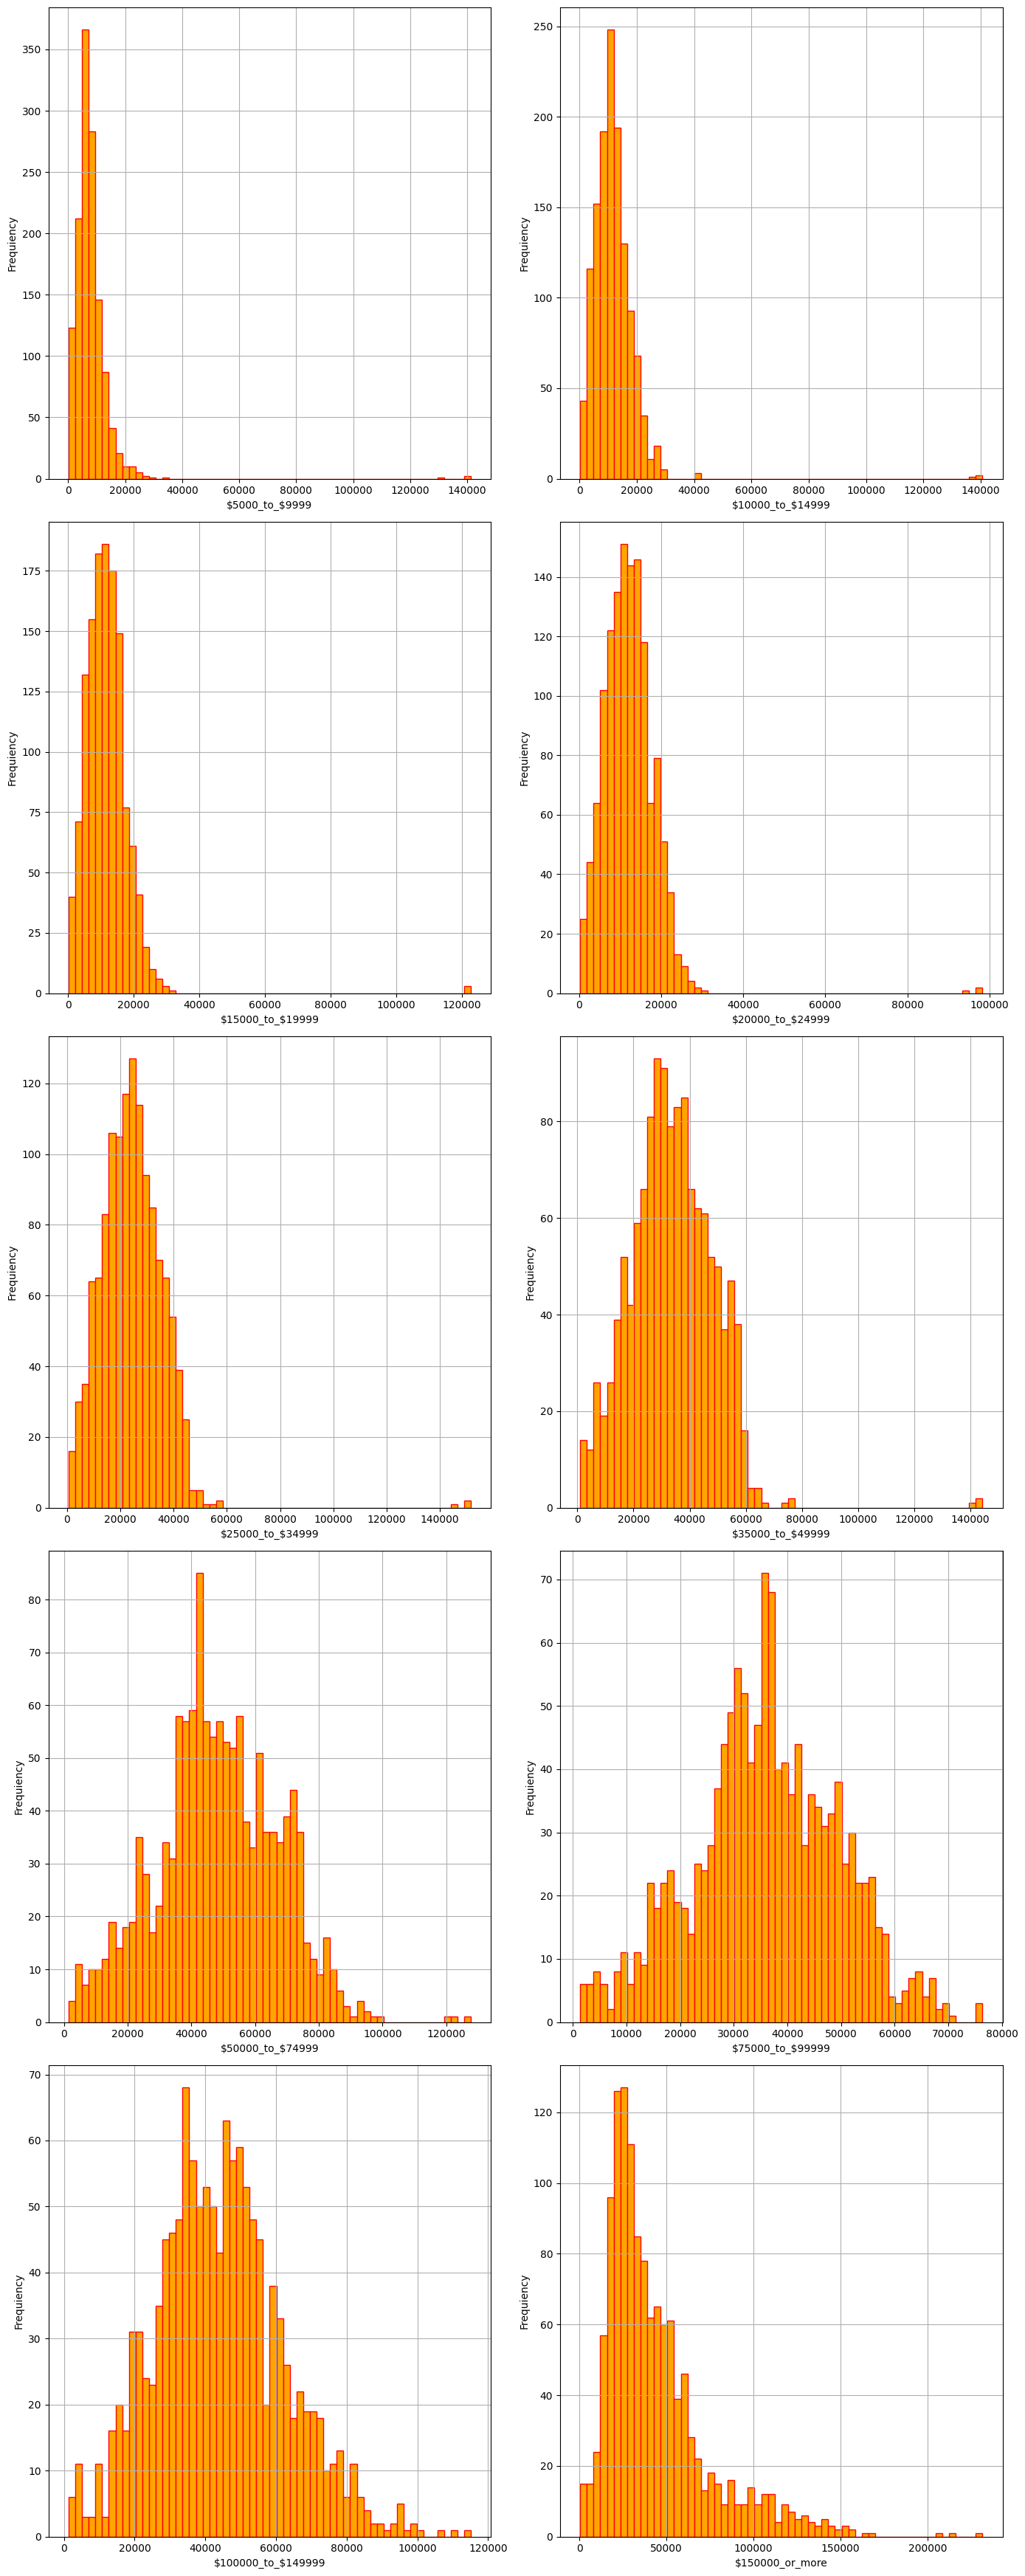

In [35]:
#Craft a Histogram—observe the distribution of different variables.

#======================================== Histogram For Finance DataSet==================================#
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(14, 35))

#Reshaping column names
col_names = np.reshape(finance_df.columns[2:], (5, 2))


for i in range(5):
    for j in range(2):
        axs[i, j].hist(finance_df[col_names[i][j]], bins=60, color="orange", edgecolor="red")
        axs[i, j].set_xlabel(col_names[i][j])
        axs[i, j].set_ylabel("Frequiency")
        axs[i, j].grid(True)
    
plt.tight_layout()
plt.show()

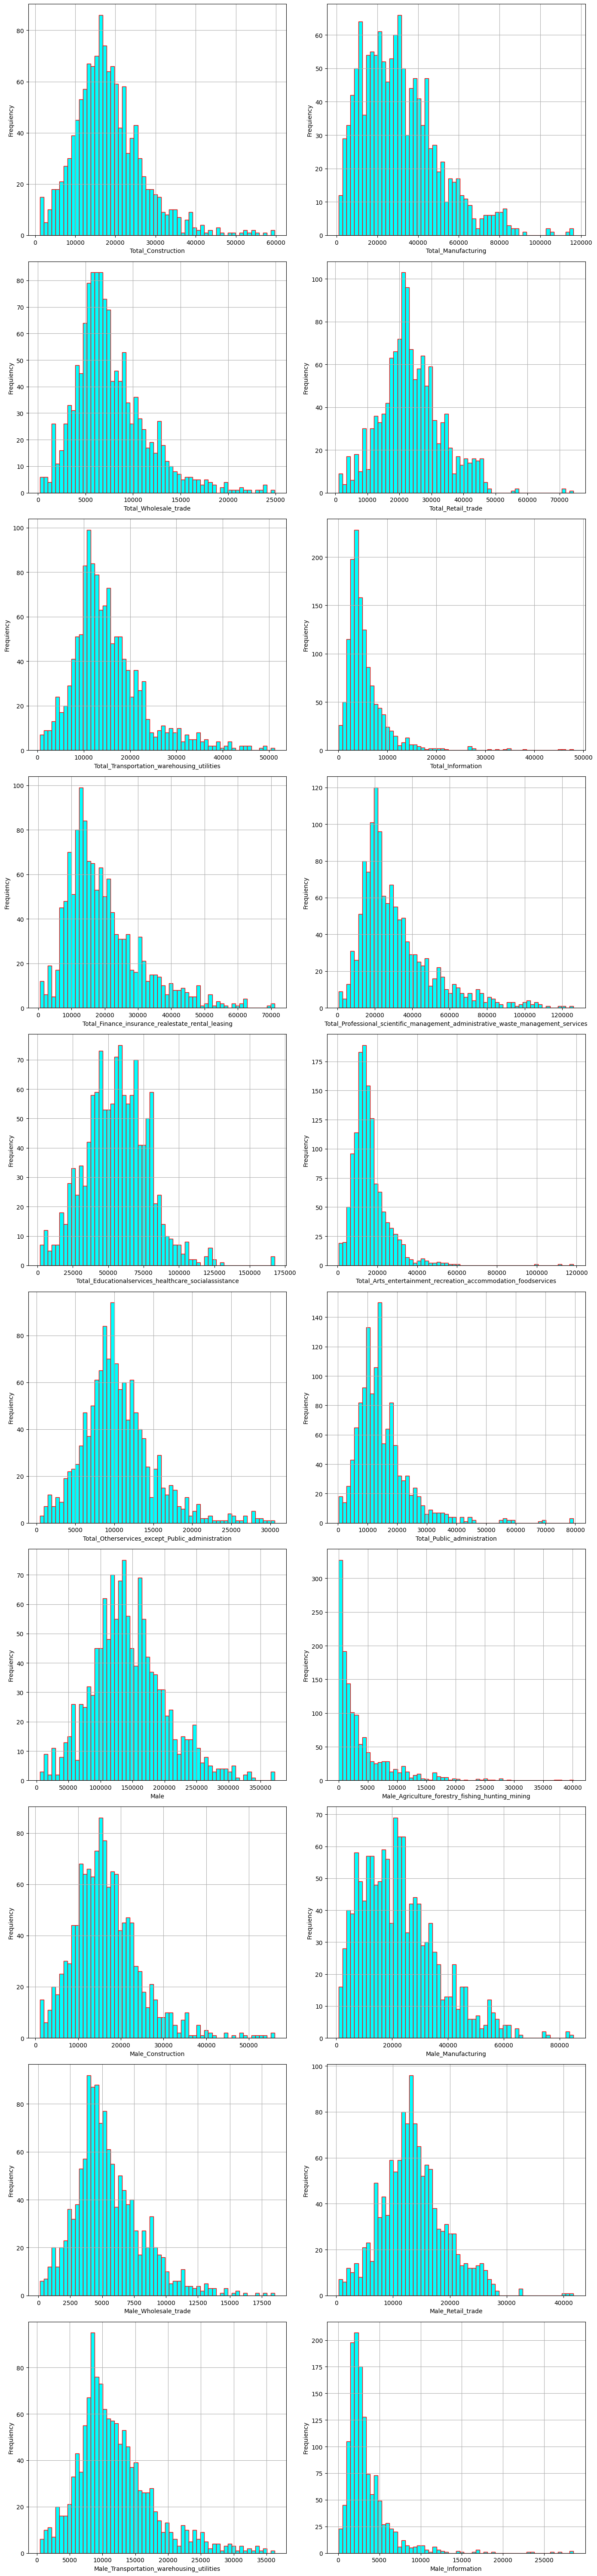

In [36]:
#======================================== Histogram For Industry DataSet==================================#
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(14, 60))

#Reshaping column names
col_names = np.reshape(industry_df.columns[2:22], (10, 2))


for i in range(10):
    for j in range(2):
        axs[i, j].hist(industry_df[col_names[i][j]], bins=60, color="cyan", edgecolor="red")
        axs[i, j].set_xlabel(col_names[i][j])
        axs[i, j].set_ylabel("Frequiency")
        axs[i, j].grid(True)
    
plt.tight_layout()
plt.show()

- Plotting PieCharts

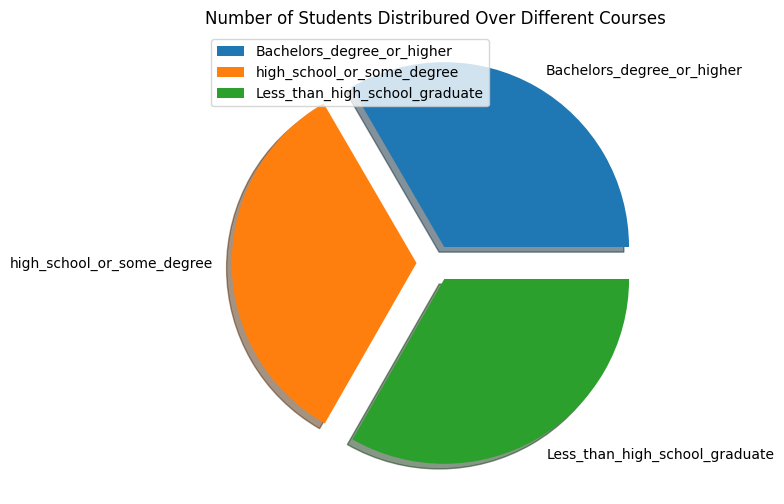

In [37]:
#======================================== PieChart For Education DataSet==================================#
#Number of unique entries in each column
unique_entries = education_df.nunique(axis=0)
mylabels = education_df.columns[1:]
myexploide = [0.1, 0.1, 0.1]

#Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(unique_entries[1:], labels=mylabels, shadow=True, explode=myexploide)
plt.title("Number of Students Distribured Over Different Courses")
plt.legend(loc='upper left')
plt.show()

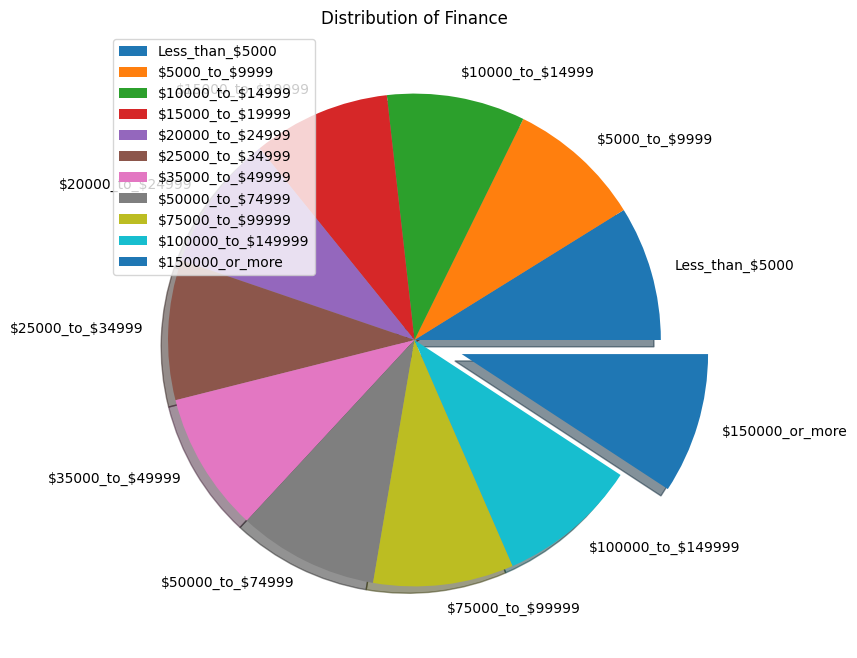

In [38]:
#======================================== PieChart For Finance DataSet==================================#
#Number of unique entries in each column
unique_entries = finance_df.nunique(axis=0)
mylabels = finance_df.columns[1:]
#Setting my explode
myexploide = np.zeros(len(mylabels) - 1) * 0.0
myexploide = np.append(myexploide, 0.2)

#Plot pie chart
plt.figure(figsize=(14, 8))
plt.pie(unique_entries[1:], labels=mylabels, shadow=True, explode=myexploide)
plt.title("Distribution of Finance")
plt.legend(loc='upper left')
plt.show()

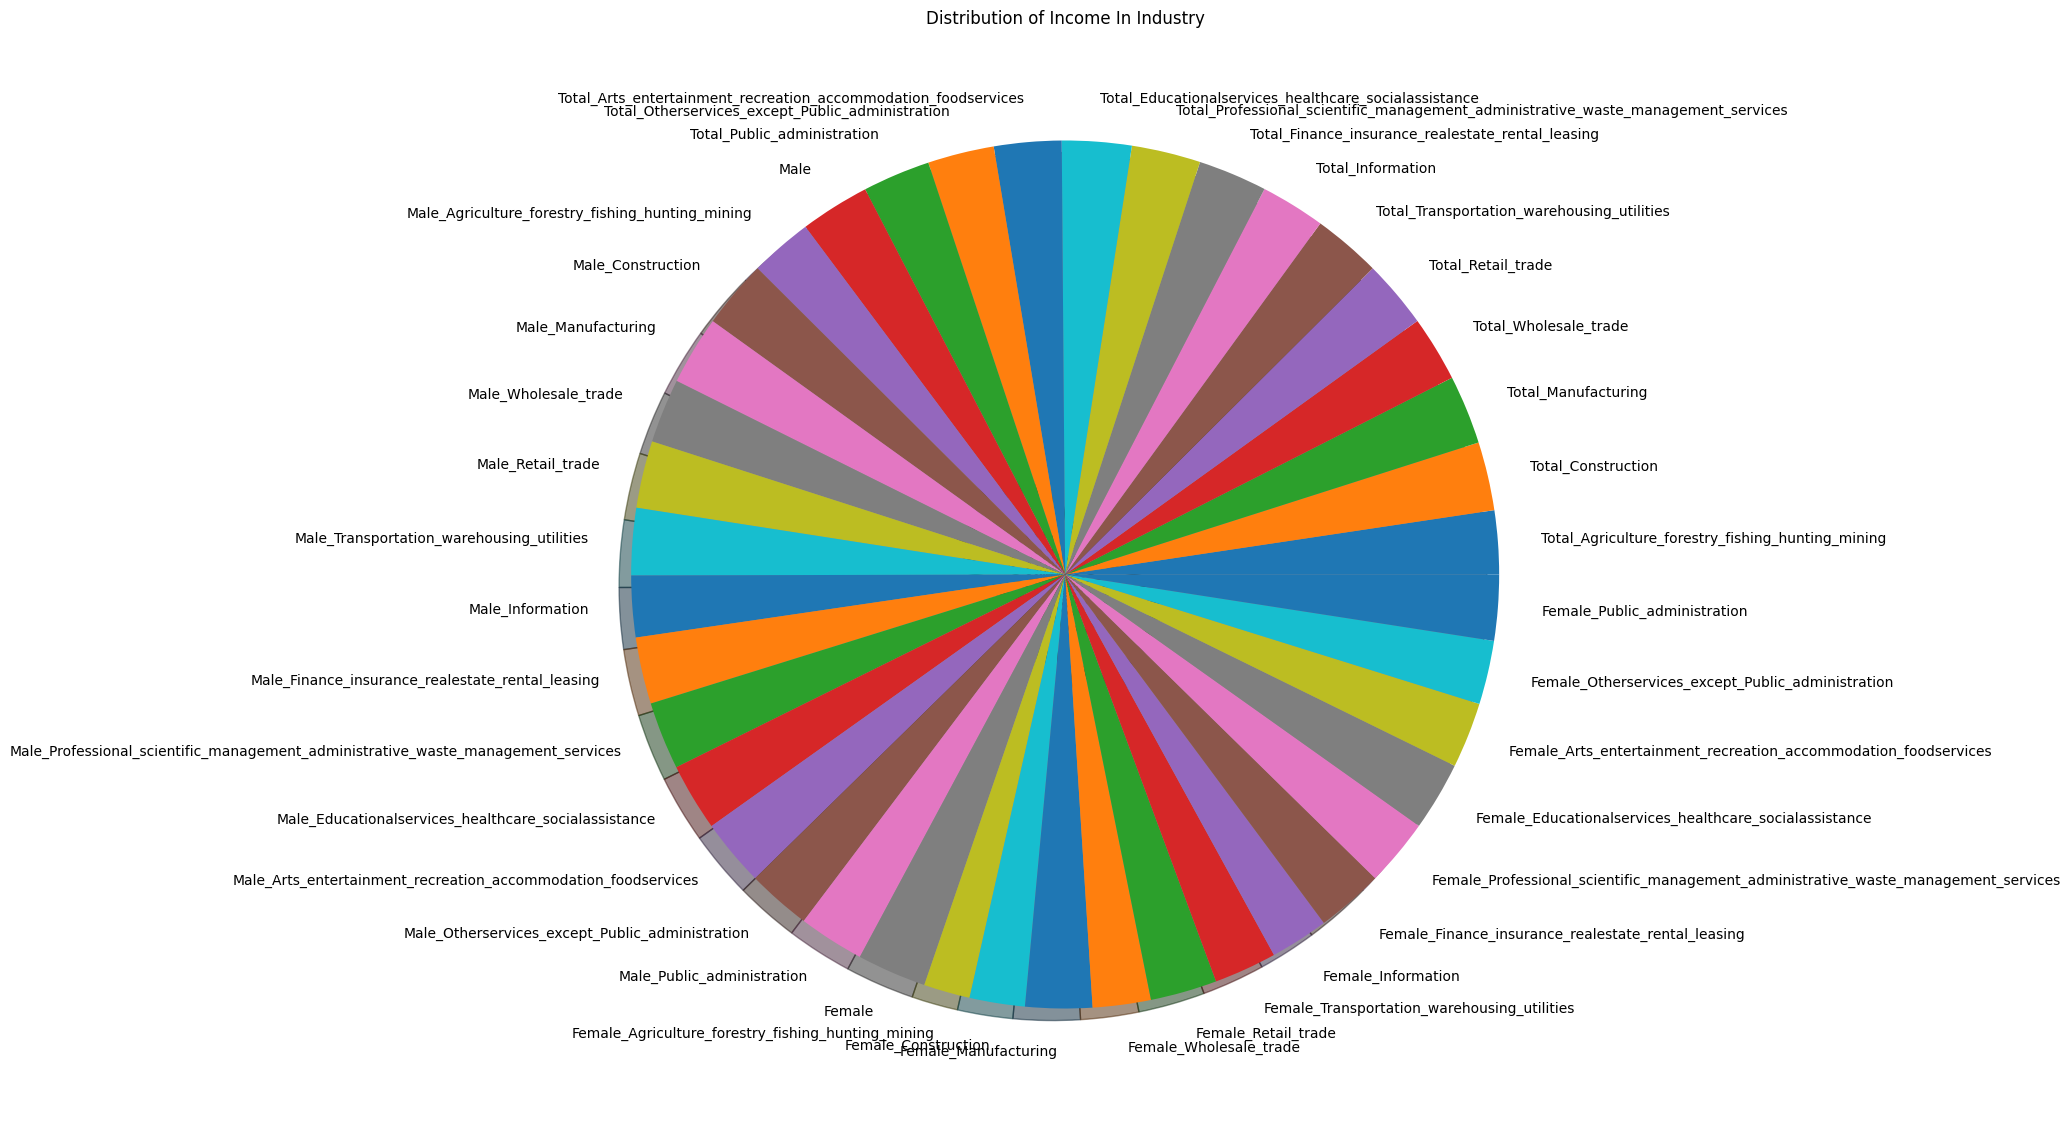

In [39]:
#======================================== PieChart For Industry DataSet==================================#
#Number of unique entries in each column
unique_entries = industry_df.nunique(axis=0)
mylabels = industry_df.columns[1:]

#Plot pie chart
plt.figure(figsize=(14, 100))
plt.pie(unique_entries[1:], labels=mylabels, shadow=True)
plt.title("Distribution of Income In Industry")
# plt.legend(loc='upper left')
plt.show()

### Problem $B$:  See the Climate data set and load it completely using Pandas

- Load the dataset into pandas dataframe

In [40]:
climate_df = pd.read_excel("./Data_Sets/Climate/Climate.xlsx", index_col=0)

#Revealing the structure of data
print(f"Shape of climate datasets: {climate_df.shape}")

Shape of climate datasets: (60, 9)


- Introducing the dataset with the first few rows

In [41]:
#Priniting first few rows of climate dataset
climate_df.head()

,Month,Monthly Precipatation(cm),Highest Temp.,Lowest Temp,Aridity Index,Paddy Production(Tonnes),Vegerable Production(Tonns),Percent of People reporting Water Scarcity,People dying from Heat Strokes
Year,,,,,,,,,
2011,Jan,5,25,11,2,15,10,10,0
2011,Feb,10,28,14,2,4,5,30,0
2011,Mar,7,32,18,3,3,5,45,2
2011,Apr,6,39,20,3,2,2,78,10
2011,May,13,41,23,4,2,2,90,25


In [42]:
#Decode data types of each columns

#Data types of climate dataset
print(f"Data types of each feature in climate dataset:\n{climate_df.dtypes}\n")

Data types of each feature in climate dataset:
Month                                         object
Monthly Precipatation(cm)                      int64
Highest Temp.                                  int64
Lowest Temp                                    int64
Aridity Index                                  int64
Paddy Production(Tonnes)                       int64
Vegerable Production(Tonns)                    int64
Percent of People reporting Water Scarcity     int64
People dying from Heat Strokes                 int64
dtype: object



- Do you see any patterns in the crop production in the area?
  - It's hard to see the trends of data by seeing the textual data

- Exploring the relationship b/w Lowest and Highest Temp

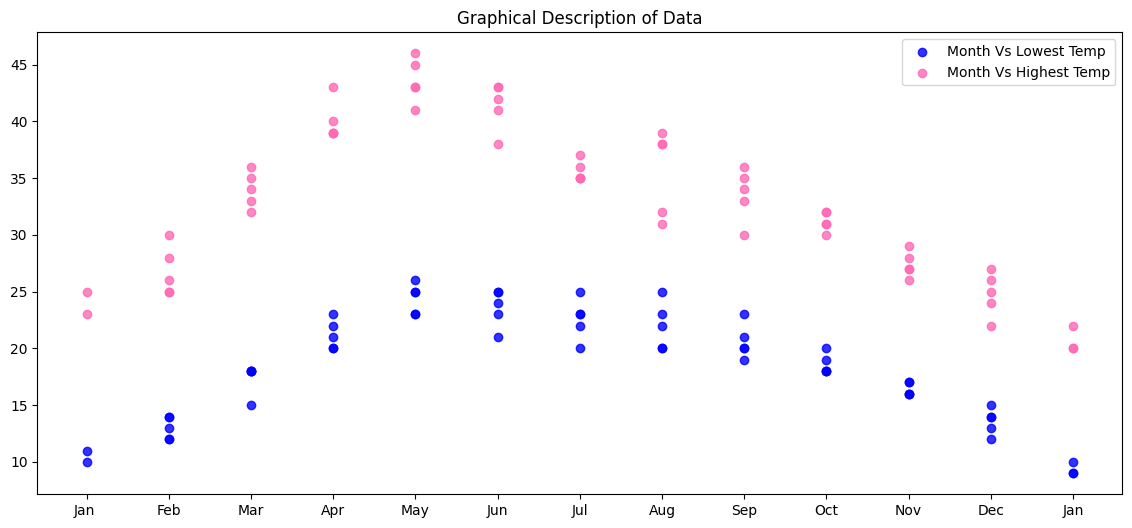

In [43]:
#Explorining the relationship between highest and lowest temp using scatter plot
plt.figure(figsize=(14, 6))


#Scatter plot : A Quick overview of data
plt.scatter(climate_df['Month'], climate_df['Lowest Temp'],
            color="blue", label="Month Vs Lowest Temp", alpha=0.8)
plt.scatter(climate_df['Month'], climate_df['Highest Temp.'],
            color="hotpink", label="Month Vs Highest Temp", alpha=0.8)


plt.title("Graphical Description of Data")
plt.legend()
plt.show()

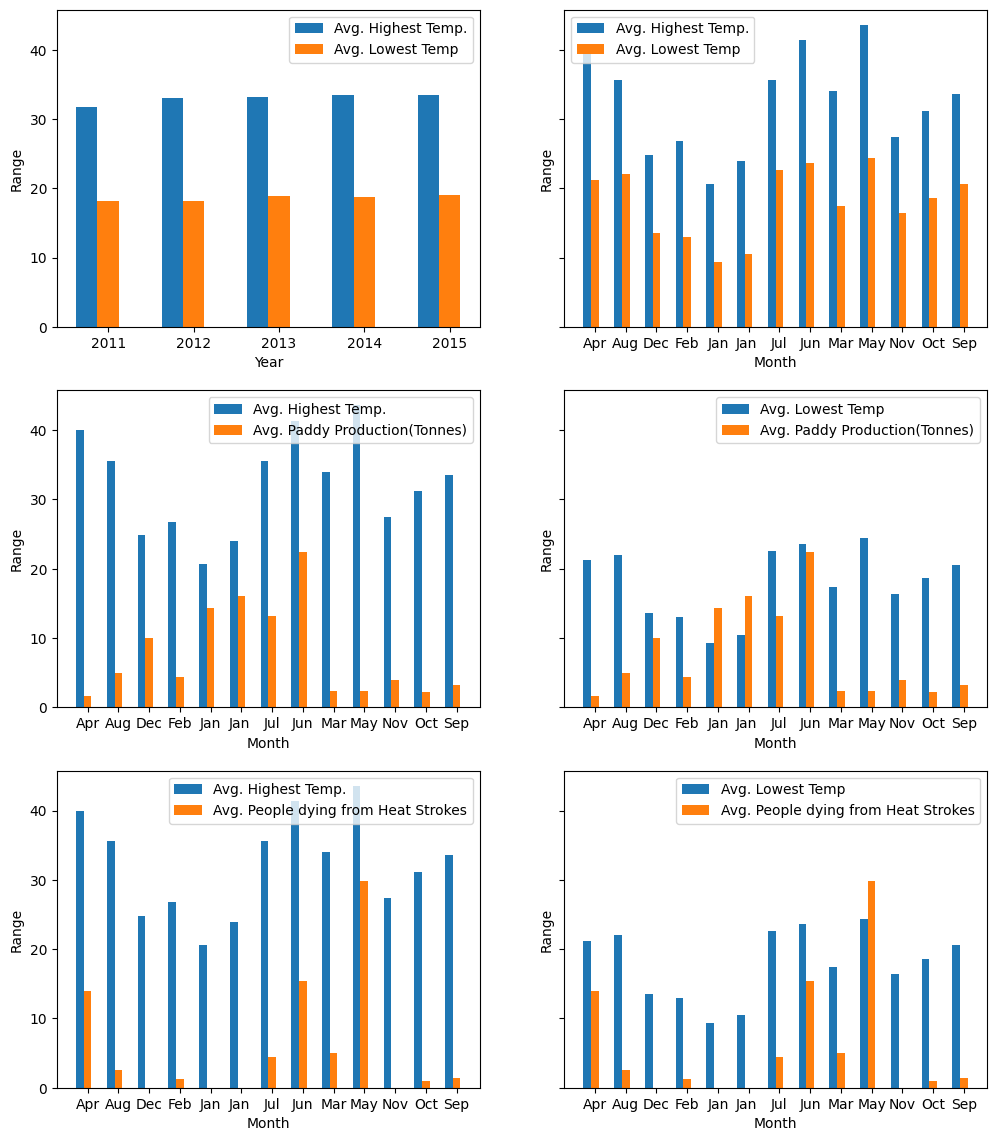

In [44]:
#Explorining the relationship between features of climate dataset using bar plots


#========================================Year Vs Avg(Hihest Temp. and Lowest Temp.)==================================#
#Group them by year and then take mean of highest temp. and lowest temp
avg_temp = climate_df.iloc[:, 2:4].groupby(['Year']).mean()
len_of_dist_years = len(avg_temp.index)

#Setting width and equal intervals for xticks
set_width = 0.25
equal_intervals = np.arange(len_of_dist_years)

#Create a subplot with 3 rows and 2 columns
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 14), sharey=True)

#Plot the bar graph
multiplier = 0
for col in avg_temp.columns:
    ax[0, 0].bar(equal_intervals + set_width * multiplier, avg_temp[col], 
              width=set_width, label="Avg. " + col)
    multiplier += 1
ax[0, 0].set_xlabel("Year")
ax[0, 0].set_ylabel("Range")
ax[0, 0].legend()
ax[0, 0].set_xticks(equal_intervals + set_width, avg_temp.index)







#========================================Month Vs Avg(Hihest Temp. and Lowest Temp.)==================================#
#Group them by month and then take mean of highest temp. and lowest temp
avg_temp = climate_df.iloc[:, [0, 2, 3]].groupby(['Month']).mean()
len_of_dist_months = len(avg_temp.index)

#Setting width and equal intervals for xticks
set_width = 0.25
equal_intervals = np.arange(len_of_dist_months)


#Plot the bar graph
multiplier = 0
for col in avg_temp.columns:
    ax[0, 1].bar(equal_intervals + set_width * multiplier, avg_temp[col], 
              width=set_width, label="Avg. " + col)
    multiplier += 1
ax[0, 1].set_xlabel("Month")
ax[0, 1].set_ylabel("Range")
ax[0, 1].legend()
ax[0, 1].set_xticks(equal_intervals + set_width, avg_temp.index)


#========================================Month Vs Avg(Hihest Temp. and Paddy Production(Tonnes))==================================#
#Group them by month and then take mean of highest temp. and Paddy Production(Tonnes)
avg_temp = climate_df.iloc[:, [0, 2, 5]].groupby(['Month']).mean()
len_of_dist_months = len(avg_temp.index)

#Setting width and equal intervals for xticks
set_width = 0.25
equal_intervals = np.arange(len_of_dist_months)


#Plot the bar graph
multiplier = 0
for col in avg_temp.columns:
    ax[1, 0].bar(equal_intervals + set_width * multiplier, avg_temp[col], 
              width=set_width, label="Avg. " + col)
    multiplier += 1
ax[1, 0].set_xlabel("Month")
ax[1, 0].set_ylabel("Range")
ax[1, 0].legend()
ax[1, 0].set_xticks(equal_intervals + set_width, avg_temp.index)


#========================================Month Vs Avg(Lowest Temp. and Paddy Production(Tonnes))==================================#
#Group them by month and then take mean of lowest temp. and Paddy Production(Tonnes)
avg_temp = climate_df.iloc[:, [0, 3, 5]].groupby(['Month']).mean()
len_of_dist_months = len(avg_temp.index)

#Setting width and equal intervals for xticks
set_width = 0.25
equal_intervals = np.arange(len_of_dist_months)


#Plot the bar graph
multiplier = 0
for col in avg_temp.columns:
    ax[1, 1].bar(equal_intervals + set_width * multiplier, avg_temp[col], 
              width=set_width, label="Avg. " + col)
    multiplier += 1
ax[1, 1].set_xlabel("Month")
ax[1, 1].set_ylabel("Range")
ax[1, 1].legend()
ax[1, 1].set_xticks(equal_intervals + set_width, avg_temp.index)




#========================================Month Vs Avg(Hihest Temp. and People dying from Heat Strokes)==================================#
#Group them by month and then take mean of highest temp. and People dying from Heat Strokes
avg_temp = climate_df.iloc[:, [0, 2, 8]].groupby(['Month']).mean()
len_of_dist_months = len(avg_temp.index)

#Setting width and equal intervals for xticks
set_width = 0.25
equal_intervals = np.arange(len_of_dist_months)


#Plot the bar graph
multiplier = 0
for col in avg_temp.columns:
    ax[2, 0].bar(equal_intervals + set_width * multiplier, avg_temp[col], 
              width=set_width, label="Avg. " + col)
    multiplier += 1
ax[2, 0].set_xlabel("Month")
ax[2, 0].set_ylabel("Range")
ax[2, 0].legend()
ax[2, 0].set_xticks(equal_intervals + set_width, avg_temp.index)


#========================================Month Vs Avg(Lowest Temp. and People dying from Heat Strokes)==================================#
#Group them by month and then take mean of lowest temp. and People dying from Heat Strokes
avg_temp = climate_df.iloc[:, [0, 3, 8]].groupby(['Month']).mean()
len_of_dist_months = len(avg_temp.index)

#Setting width and equal intervals for xticks
set_width = 0.25
equal_intervals = np.arange(len_of_dist_months)


#Plot the bar graph
multiplier = 0
for col in avg_temp.columns:
    ax[2, 1].bar(equal_intervals + set_width * multiplier, avg_temp[col], 
              width=set_width, label="Avg. " + col)
    multiplier += 1
ax[2, 1].set_xlabel("Month")
ax[2, 1].set_ylabel("Range")
ax[2, 1].legend()
ax[2, 1].set_xticks(equal_intervals + set_width, avg_temp.index)

plt.show()


- With ease we can observe the trends in data set, like with incresing temp. people dying with heat strokes
increases, and much more